<div class="alert alert-block alert-success">
<b>Reviewer's comment 2</b> <a class="tocSkip"></a>

Hi again! You did very nice fixes. I accept your project, congratulations! Good luck in the next project :)
</div>

<b>Reviewer's comment</b>

Hello, Rozental! My name is Andrey Isupov. I checked your project. You did a very good job on the project. But there are few things that need fix. I think it is not so difficult for you and you will quickly cope with it. Good luck :)

Below you will find my comments - **please do not move, modify or delete them**.

You can find my comments in green, yellow or red boxes like this:

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Success. Everything is done succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Remarks. Some recommendations.
</div>

<div class="alert alert-block alert-danger">

<b>Reviewer's comment</b> <a class="tocSkip"></a>

Needs fixing. The block requires some corrections. Work can't be accepted with the red comments.
</div>

You can answer me by using this:

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

Thank you the feedback. I fixed all the requirement. Thank you for the tip for the plotly. Will implement going forward (not on this project due to lack of time).
</div>

### Introduction for the project

The goal of this project is to identify patterns, based on user and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales that determine whether a game succeeds or not. This will allow you to spot potential big winners and plan advertising campaigns. 

The dataset contains the abbreviation ESRB. The Entertainment Software Rating Board evaluates a game's content and assigns an age rating such as Teen or Mature.

#### Outline of work

- Assess the data, and make decisions about the values.

- construct charts, histograms and boxplots to find distrebution of values.

- Perform hypothesis testing on the data using Pandas, Numpy, and the spicy.stats module in Python.


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Thanks for the description
</div>

### Open the data file and study the general information

#### importing libraries

In [4]:
!python -m pip install --upgrade pip
!python -m pip install -U sidetable
!python -m pip install -U seaborn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 2.1 MB 1.0 MB/s eta 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

There was an error! I helped you to fix it, but be careful in the next time, because some reviewers can write you a red comment!
</div>

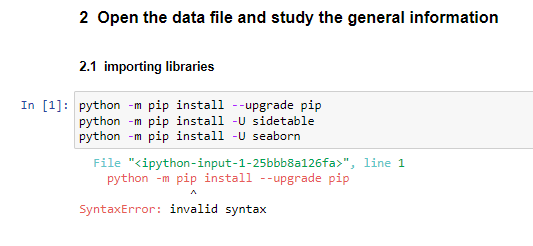

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
Thanks
</div>

In [19]:
import pandas as pd
import numpy as np
from scipy import stats as st
import datetime as dt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
#import sidetable as stb
from functools import reduce

%matplotlib inline

pd.options.display.float_format = '{:.3f}'.format

In [20]:
import sys
import warnings
if not sys.warnoptions:
        warnings.simplefilter("ignore");

In [21]:
#pip install -U sidetable
#pip install -U seaborn

That sidetable thing was making trouble. Also pip install decided to rebel, so seaplot histplot sometimes decides not to work.

#### Loading the data files

In [22]:
try: 
    games = pd.read_csv('games.csv ')
except:
    games = pd.read_csv('/datasets/games.csv')
   
 
print(len(games), games.head())

16715                        Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii         2006.000        Sports    41.360   
1         Super Mario Bros.      NES         1985.000      Platform    29.080   
2            Mario Kart Wii      Wii         2008.000        Racing    15.680   
3         Wii Sports Resort      Wii         2009.000        Sports    15.610   
4  Pokemon Red/Pokemon Blue       GB         1996.000  Role-Playing    11.270   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0    28.960     3.770        8.450        76.000          8      E  
1     3.580     6.810        0.770           nan        NaN    NaN  
2    12.760     3.790        3.290        82.000        8.3      E  
3    10.930     3.280        2.950        80.000          8      E  
4     8.890    10.220        1.000           nan        NaN    NaN  


In [23]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [24]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000,16715.000,16715.000,16715.000,16715.000,8137.000
mean,2006.485,0.263,0.145,0.078,0.047,68.968
std,5.877,0.814,0.503,0.309,0.187,13.938
min,1980.000,0.000,0.000,0.000,0.000,13.000
25%,2003.000,0.000,0.000,0.000,0.000,60.000
50%,2007.000,0.080,0.020,0.000,0.010,71.000
75%,2010.000,0.240,0.110,0.040,0.030,79.000
max,2016.000,41.360,28.960,10.220,10.570,98.000


In [25]:
games.describe(include='object')

,Name,Platform,Genre,User_Score,Rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


In [26]:
games.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
10840,Ultimate Marvel vs. Capcom 3,PS3,2011.000,Fighting,0.000,0.040,0.040,0.010,80.000,6.2,T
4341,Bee Movie Game,DS,2007.000,Action,0.410,0.000,0.000,0.030,58.000,tbd,E
9837,Mahou Shoujo Lyrical Nanoha A's Portable: The ...,PSP,2011.000,Fighting,0.000,0.000,0.120,0.000,nan,NaN,NaN
2302,Avatar: The Game,PS3,2009.000,Action,0.320,0.420,0.000,0.160,nan,NaN,NaN
621,Mortal Kombat: Deadly Alliance,PS2,2002.000,Fighting,1.810,0.520,0.000,0.150,79.000,8.8,M
7735,Test Drive Unlimited 2,PC,nan,Racing,0.050,0.110,0.000,0.030,72.000,5.7,T
13080,Legend of Kay,WiiU,2015.000,Action,0.030,0.020,0.000,0.000,nan,NaN,NaN
9818,Backyard Sports Football: Rookie Rush,Wii,2010.000,Sports,0.110,0.000,0.000,0.010,nan,NaN,NaN
14148,Alienators: Evolution Continues,GBA,2001.000,Action,0.030,0.010,0.000,0.000,54.000,tbd,E
9560,Green Lantern: Rise of the Manhunters,X360,2011.000,Action,0.070,0.040,0.000,0.010,59.000,7.2,T


In [27]:
#games.stb.missing(style=True)

In [28]:
games.isnull().sum()/ games.shape[0] * 100

Name               0.012
Platform           0.000
Year_of_Release    1.609
Genre              0.012
NA_sales           0.000
EU_sales           0.000
JP_sales           0.000
Other_sales        0.000
Critic_Score      51.319
User_Score        40.090
Rating            40.479
dtype: float64

In [29]:
print(games.duplicated().sum())

0


checked for duplicates, no duplicates found

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Very good data review
</div>

#### Preparing the data

##### Replace the column names (make them lowercase)

In [30]:
games.columns = games.columns.str.lower()
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.000,Sports,41.360,28.960,3.770,8.450,76.000,8,E
1,Super Mario Bros.,NES,1985.000,Platform,29.080,3.580,6.810,0.770,nan,NaN,NaN
2,Mario Kart Wii,Wii,2008.000,Racing,15.680,12.760,3.790,3.290,82.000,8.3,E
3,Wii Sports Resort,Wii,2009.000,Sports,15.610,10.930,3.280,2.950,80.000,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.000,Role-Playing,11.270,8.890,10.220,1.000,nan,NaN,NaN


##### Convert the data to the required types.

In [31]:
games['year_of_release'] = pd.to_datetime(games['year_of_release'], format='%Y')
games['year_of_release'] = pd.DatetimeIndex(games['year_of_release']).year
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.000,Sports,41.360,28.960,3.770,8.450,76.000,8,E
1,Super Mario Bros.,NES,1985.000,Platform,29.080,3.580,6.810,0.770,nan,NaN,NaN
2,Mario Kart Wii,Wii,2008.000,Racing,15.680,12.760,3.790,3.290,82.000,8.3,E
3,Wii Sports Resort,Wii,2009.000,Sports,15.610,10.930,3.280,2.950,80.000,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.000,Role-Playing,11.270,8.890,10.220,1.000,nan,NaN,NaN


In [32]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Maybe we will convert year to the type 'int'?)
</div>

##### Decide how to deal with missing values

In [33]:
games.isnull().sum()/ games.shape[0] * 100

name               0.012
platform           0.000
year_of_release    1.609
genre              0.012
na_sales           0.000
eu_sales           0.000
jp_sales           0.000
other_sales        0.000
critic_score      51.319
user_score        40.090
rating            40.479
dtype: float64

###### Year_of_Release missing values

The year of release could theoreticaly be found out by searching in the web by each games name. But having said that the it's such a small percentage of column values (1.609%) that it's negligible. 
The values could clearly be replaced by 0 (.fillna(0)), but that obviously gives us no info so I see no reason why create values that are going to be filtered out any way in any analysis that is conected to year of release. The rows should not be droped because they may include crucial data in other columns (like the sales columns). 

They are possibly missing because of input errors as they are a negligable percentage of values, and that is typical for errorous input not a pattern.

###### User-score and critic_score missing values

The User-score and critic_score missing values are a large percentage of all column values in these columns. But I see no way of resoring the values as no other value of the values available, can indicate what those values could be. Having said that if the score in one column exists and in the other does not, this singular score could be set as the value of the missing value. But they are ranked on differant scales (10 scale, and 100 scale). And tring to restore the values that way is higly problematic (I've tried), and not going to help much.  

They are possibly missing because no such score exists as they are a very large percentage of values.

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

You have tasks in hypothesis 'Average user ratings of the Xbox One and PC platforms are the same' and 'Average user ratings for the Action and Sports genres are different.', so we can't just fill in empty values in user score based on data from other columns, because it can skew test results
</div>

In [34]:
games[games.user_score.isnull()]['critic_score'].count()

38

In [35]:
games[games.user_score == 'tbd']['critic_score'].count()

1082

In [36]:
games.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [37]:
games.user_score = games.user_score.fillna(games.critic_score/10)
games[games.user_score.isnull()]['critic_score'].count()

0

Tried doing the same for critic_score, proved highly problematic user score being an object and all that.

In [38]:
games[games.critic_score.isnull()]['user_score'].count()

1915

In [39]:
games_user_clean = games.query('user_score != "tbd"')
games_user_clean['user_score'].apply(lambda x: float(x))

0       8.000
1         nan
2       8.300
3       8.000
4         nan
         ... 
16710     nan
16711     nan
16712     nan
16713     nan
16714     nan
Name: user_score, Length: 14291, dtype: float64

In [40]:
games.critic_score = games.critic_score.fillna(games_user_clean['user_score'].apply(lambda x: float(x))*10)
games[games.critic_score.isnull()]['user_score'].count()

1342

In [41]:
games.critic_score.unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 48., 45., 79., 70.,
       59., 64., 75., 60., 63., 42., 69., 32., 50., 25., 44., 55., 47.,
       57., 29., 65., 51., 54., 20., 53., 37., 30., 38., 33., 27., 52.,
       43., 35., 40., 46., 28., 39., 34., 31.,  0., 16., 41., 36., 24.,
       18., 17., 11., 26.,  3., 19., 23.,  7., 13.,  2., 21., 14., 22.,
        9., 12.,  6.])

In [42]:
games.isnull().sum()/ games.shape[0] * 100

name               0.012
platform           0.000
year_of_release    1.609
genre              0.012
na_sales           0.000
eu_sales           0.000
jp_sales           0.000
other_sales        0.000
critic_score      47.891
user_score        39.862
rating            40.479
dtype: float64

###### Sales zero values

Those values could not be restored, becaouse the sales in diferant regions differ greatly a game that performs well i9n Japan may fail in Europe or N. American market.

###### rating missing values

The Entertainment Software Rating Board (ESRB) evaluates a game's content and assigns the rating. I guess they can be factured in as to be decided (TBD), as they are prabably missing because ESRB have not decided what rating to give them.   

In [43]:
games.rating = games.rating.fillna("TBD")

##### decide how to deal with tbd values

In [44]:
games.rating.unique()

array(['E', 'TBD', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

The rows containing the values could be used and analysed for other factors un-related to the ESRB rating.

In [45]:
games[games.user_score == 'tbd']['critic_score'].count()

1082

The rows containing the values could be used and analysed for other factors un-related to the user score.

##### Calculate the total sales (the sum of sales in all regions) for each game

In [46]:
games['total_sales'] = games.na_sales + games.eu_sales + games.jp_sales + games.other_sales 
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.000,Sports,41.360,28.960,3.770,8.450,76.000,8,E,82.540
1,Super Mario Bros.,NES,1985.000,Platform,29.080,3.580,6.810,0.770,nan,NaN,TBD,40.240
2,Mario Kart Wii,Wii,2008.000,Racing,15.680,12.760,3.790,3.290,82.000,8.3,E,35.520
3,Wii Sports Resort,Wii,2009.000,Sports,15.610,10.930,3.280,2.950,80.000,8,E,32.770
4,Pokemon Red/Pokemon Blue,GB,1996.000,Role-Playing,11.270,8.890,10.220,1.000,nan,NaN,TBD,31.380


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Very good data prepairing. Let's start the analysis
</div>

### Analyze the data

#### how many games were released in different years

In [47]:
game_year=games[['year_of_release','name']].groupby(['year_of_release']).count().sort_values(by='year_of_release').reset_index()
game_year

,year_of_release,name
0,1980.000,9
1,1981.000,46
2,1982.000,36
3,1983.000,17
4,1984.000,14
5,1985.000,14
6,1986.000,21
7,1987.000,16
8,1988.000,15
9,1989.000,17


This data could be better visualised in a chart. 

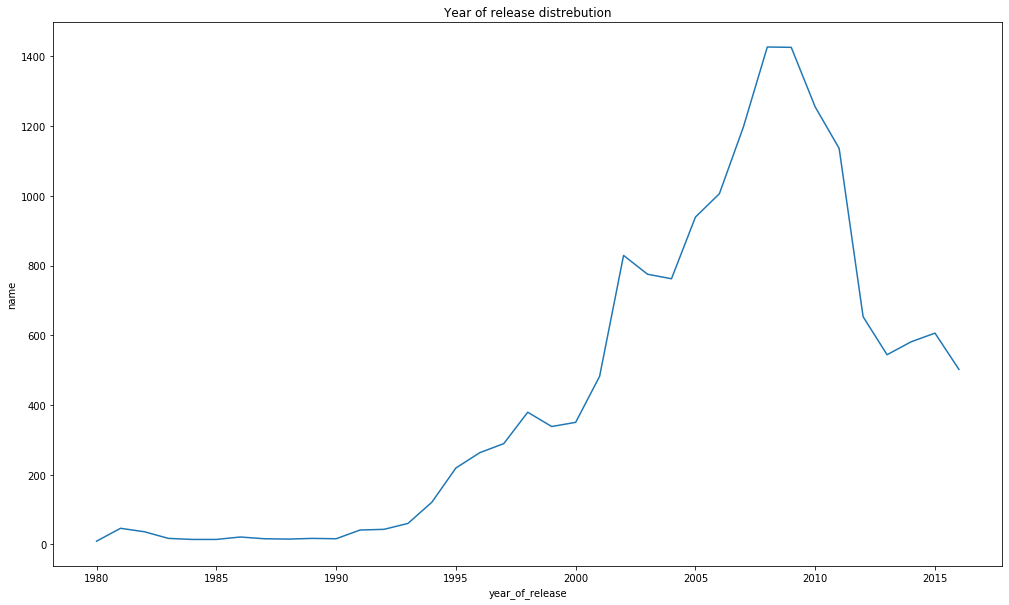

count     37.000
mean     444.432
std      451.604
min        9.000
25%       36.000
50%      338.000
75%      762.000
max     1427.000
Name: name, dtype: float64


In [48]:
fig,ax=plt.subplots(figsize=(17,10))
#sns.histplot(data=game_year, x="year_of_release", color='deepskyblue', shrink=0.8)
sns.lineplot(x=game_year['year_of_release'], y=game_year['name'])
plt.title("Year of release distrebution")
plt.show()
print(game_year.name.describe())

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Beautiful
</div>

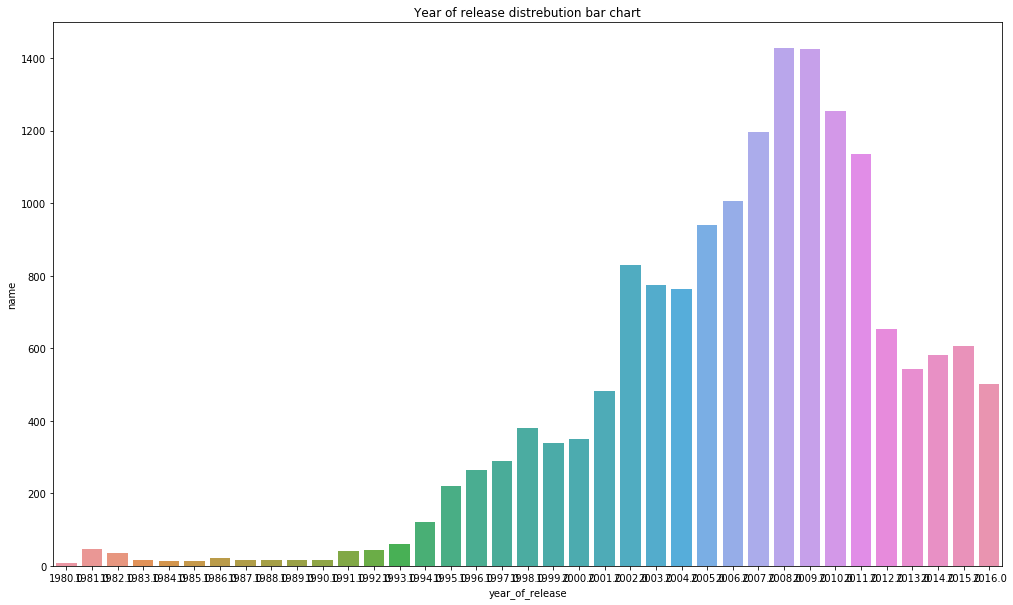

In [67]:
fig,ax=plt.subplots(figsize=(17,10))
sns.barplot(x='year_of_release', y='name', data=game_year)
plt.title("Year of release distrebution bar chart")
plt.show()

Too much data, so it can be devided into 2 charts.

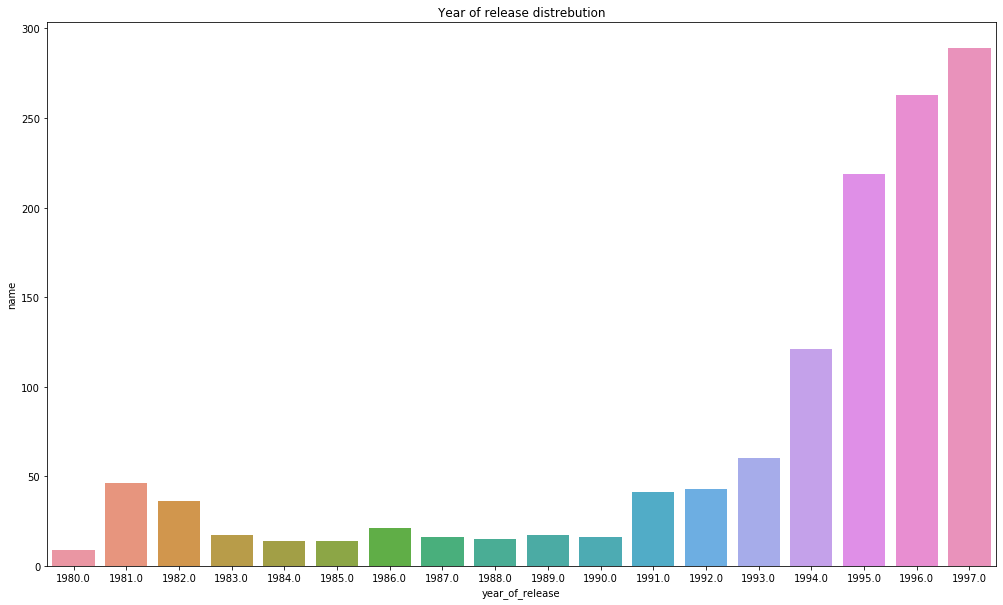

In [66]:
game_year_1= game_year.query('year_of_release <= 1997')

fig,ax=plt.subplots(figsize=(17,10))
sns.barplot(x='year_of_release', y='name', data=game_year_1)
plt.title("Year of release distrebution")
plt.show()

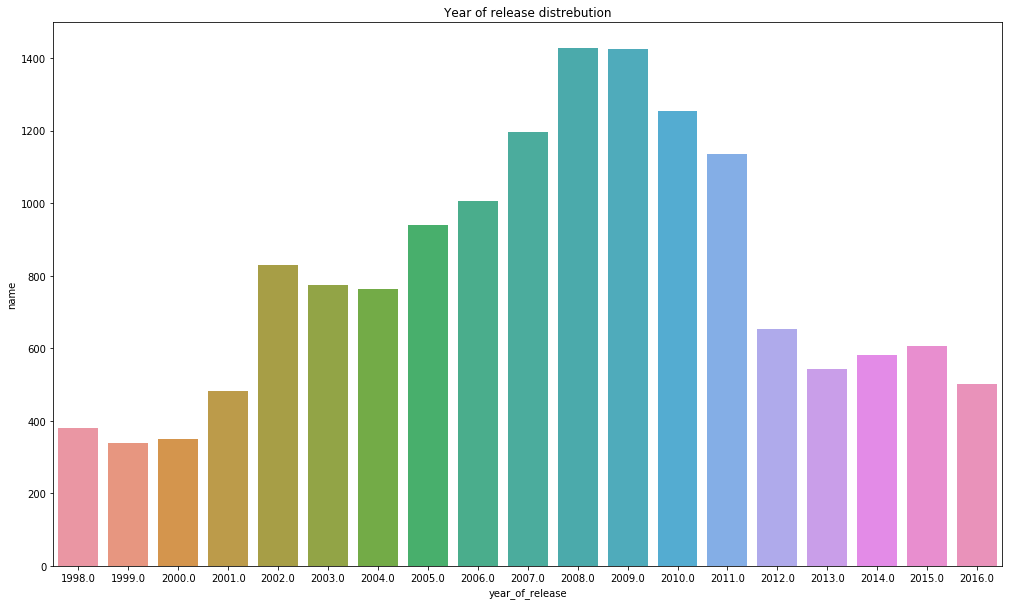

In [65]:
game_year_2= game_year.query('year_of_release > 1997')

fig,ax=plt.subplots(figsize=(17,10))
sns.barplot(x='year_of_release', y='name', data=game_year_2)
plt.title("Year of release distrebution")
plt.show()

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

This is not the best idea creating pie chart for 37 sections. Many of them are unreadable, as you can see on 1980-1995 years.
    
Bar or line plot will be much better here :)
</div>

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
Done, thanks.
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment 2</b> <a class="tocSkip"></a>

Very beautiful now
</div>

This means that:

- In both the line chart and the pie chart the games sales were in an up-ward trand (increasing) up to 2008, at this year the sales reached a maximum of 1427. 

- After 2008 there is a declining trand which reaches a low of 502 sales in 2016, this amount of sales is the lowest from 2002.

- The minimum (9 sales) is at the begining at 1980 which can be explained by the low spread of gaming consoles among the population (no reason to buy PC games if you don't have a Computer).      

- The years 2008, 2009 and 2010 amount to more then a quarter of the sales (26% of the sales), further more in the range of five years (2007-2011) 40% of all sales were made, as can be seen in the pie chart. And those were the most succesful years in sales.  

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Great conclusion!
</div>

#### how sales varied from platform to platform.

In [55]:
#plat_sale=games.groupby('platform')['total_sales'].sum()
#game_year=games[['year_of_release','name']].groupby(['year_of_release']).count().sort_values(by='year_of_release').reset_index()
plat_sale=games[['platform', 'total_sales']].groupby('platform').sum().sort_values(by='total_sales').reset_index()
plat_sale

,platform,total_sales
0,PCFX,0.030
1,GG,0.040
2,3DO,0.100
3,TG16,0.160
4,WS,1.420
5,NG,1.440
6,SCD,1.860
7,DC,15.950
8,GEN,30.770
9,SAT,33.590


In [56]:
#games.stb.freq(['Platform'],style=True, cum_cols=True)

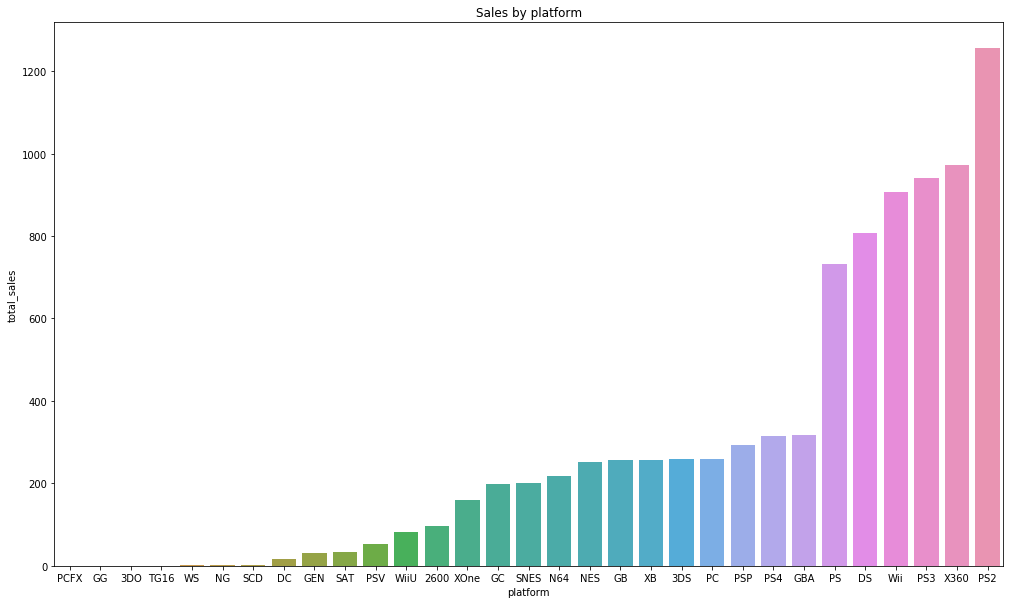

       total_sales
count       31.000
mean       287.604
std        348.160
min          0.030
25%         23.360
50%        200.040
75%        304.095
max       1255.770


In [57]:
fig,ax=plt.subplots(figsize=(17,10))
#sns.histplot(data=plat_sale, x='platform', color='deepskyblue', shrink=0.8)
sns.barplot(x='platform', y='total_sales', data=plat_sale)
plt.title("Sales by platform")
plt.show()
print(plat_sale.describe())

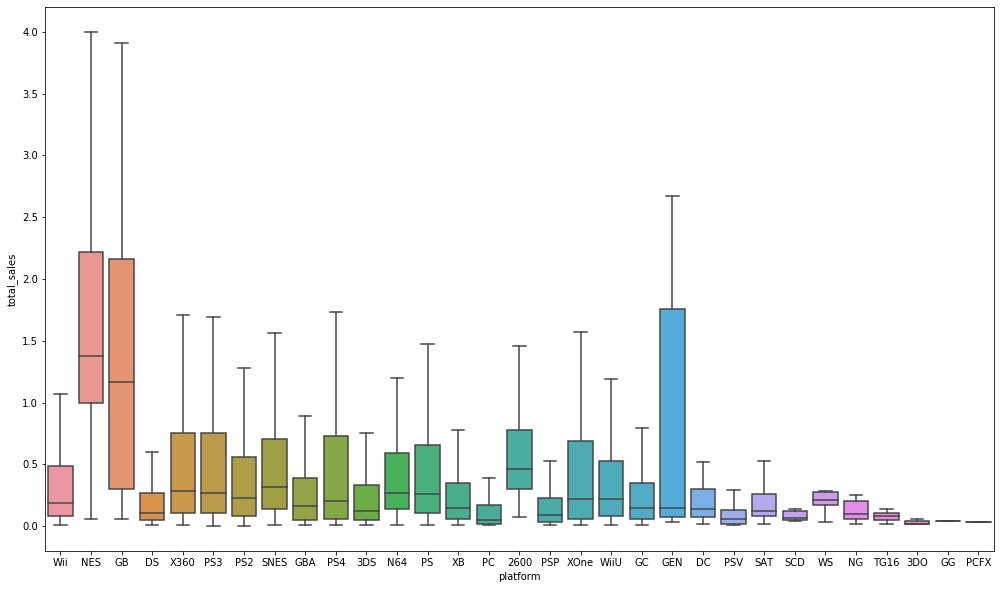

In [58]:
fig,ax=plt.subplots(figsize=(17,10))
ax=sns.boxplot(x="platform", y="total_sales", data=games, showfliers = False)

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Beautiful
</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

And again, pie chart is very unreadable when it has a lot of sections. Let's just remove it, because barplot and boxplot will be enough
</div>

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
Done, thanks.
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment 2</b> <a class="tocSkip"></a>

Perfect
</div>

This means that:
- The most succesfull console is PS2, while PCFX is the least succesfull. 

- The 5 most succesful gaming consoles are PS2, X360, PS3, Wii and DS.

- Two consoles PS2 and X360 can acount for about 25% of sales. 

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

You are right!
</div>

Let's take data from 2013 (the year of release of the new consoles).

In [60]:
games_2013 = games.query('year_of_release >= 2013')
games_2013.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013.000,Action,7.020,9.090,0.980,3.960,97.000,8.2,M,21.050
23,Grand Theft Auto V,X360,2013.000,Action,9.660,5.140,0.060,1.410,97.000,8.1,M,16.270
31,Call of Duty: Black Ops 3,PS4,2015.000,Shooter,6.030,5.860,0.360,2.380,nan,NaN,TBD,14.630
33,Pokemon X/Pokemon Y,3DS,2013.000,Role-Playing,5.280,4.190,4.350,0.780,nan,NaN,TBD,14.600
42,Grand Theft Auto V,PS4,2014.000,Action,3.960,6.310,0.380,1.970,97.000,8.3,M,12.620


##### build a distribution based on data for each year for the platforms with the greatest total sales

In [61]:
df=games_2013[['platform','total_sales']].groupby(['platform']).sum().sort_values(by='total_sales').reset_index()
df['sales_z']=(df['total_sales']-df['total_sales'].mean())/df['total_sales'].std()
df['color']=['red' if x<0 else 'green' for x in df['sales_z']]
df

,platform,total_sales,sales_z,color
0,DS,1.540,-1.001,red
1,PSP,3.500,-0.981,red
2,Wii,13.660,-0.877,red
3,PSV,32.990,-0.678,red
4,PC,39.430,-0.612,red
5,WiiU,64.630,-0.354,red
6,X360,136.800,0.386,green
7,3DS,143.250,0.452,green
8,XOne,159.320,0.617,green
9,PS3,181.430,0.844,green


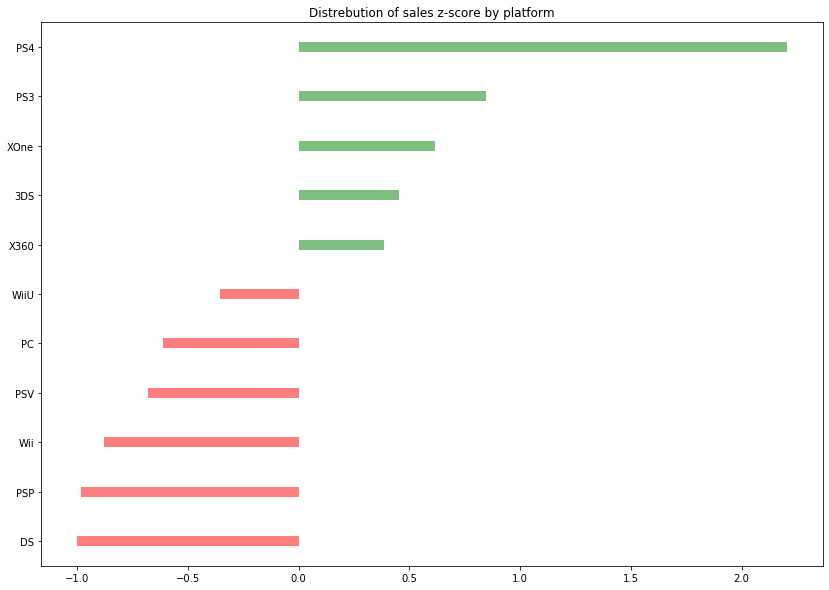

In [62]:
plt.figure(figsize=(14,10))
plt.hlines(y=df.platform,xmax=df.sales_z, xmin=0,color=df.color, alpha=0.5, linewidth=10)
plt.title("Distrebution of sales z-score by platform")
plt.show()

A Z-score is a numerical measurement that describes a value's relationship to the mean of a group of values. Z-score is measured in terms of standard deviations from the mean. If a Z-score is 0, it indicates that the data point's score is identical to the mean score. A Z-score of 1.0 would indicate a value that is one standard deviation from the mean.

As can be seen from the chart the disrebution of values is very far from the mean for most platform, which means that the disrebution of values for most platforms is very wide.

The 5 most succesful gaming consoles by z-score (positive) in the relevant time period are PS4, X360, PS3, XOne and 3DS.

##### Find platforms that used to be popular but now have zero sales

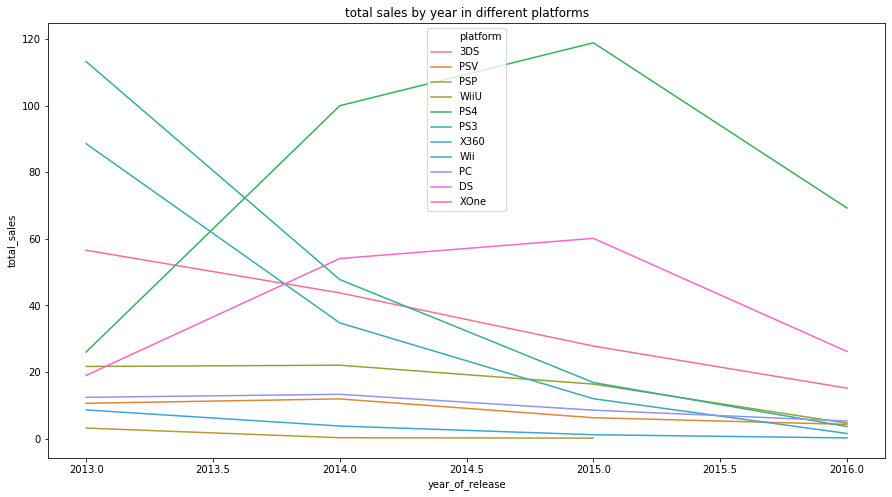

In [64]:
games_zero_ch=games_2013.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index().sort_values(by='year_of_release')

plt.figure(figsize=(15,8))
ax = sns.lineplot(data=games_zero_ch, x='year_of_release', y='total_sales',hue="platform")
plt.title("total sales by year in different platforms")
plt.show()

From those charts two consoles look like they might fit the description (used to be popular but now have zero sale)

In [68]:
#From those charts this list can be made
plat_list =  ['PSP','DS']

In [71]:
plat_gone=games.query('platform.isin(@plat_list) and year_of_release >= 2000')
plat_gone

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
6,New Super Mario Bros.,DS,2006.000,Platform,11.280,9.140,6.500,2.880,89.000,8.5,E,29.800
10,Nintendogs,DS,2005.000,Simulation,9.050,10.950,1.930,2.740,nan,NaN,TBD,24.670
11,Mario Kart DS,DS,2005.000,Racing,9.710,7.470,4.130,1.900,91.000,8.6,E,23.210
19,Brain Age: Train Your Brain in Minutes a Day,DS,2005.000,Misc,4.740,9.200,4.160,2.040,77.000,7.9,E,20.140
20,Pokemon Diamond/Pokemon Pearl,DS,2006.000,Role-Playing,6.380,4.460,6.040,1.360,nan,NaN,TBD,18.240
...,...,...,...,...,...,...,...,...,...,...,...,...
16687,Neo Angelique Special,PSP,2008.000,Adventure,0.000,0.000,0.010,0.000,nan,NaN,TBD,0.010
16698,Mega Brain Boost,DS,2008.000,Puzzle,0.010,0.000,0.000,0.000,48.000,tbd,E,0.010
16700,Mezase!! Tsuri Master DS,DS,2009.000,Sports,0.000,0.000,0.010,0.000,nan,NaN,TBD,0.010
16701,Eiyuu Densetsu: Sora no Kiseki Material Collec...,PSP,2007.000,Role-Playing,0.000,0.000,0.010,0.000,nan,NaN,TBD,0.010


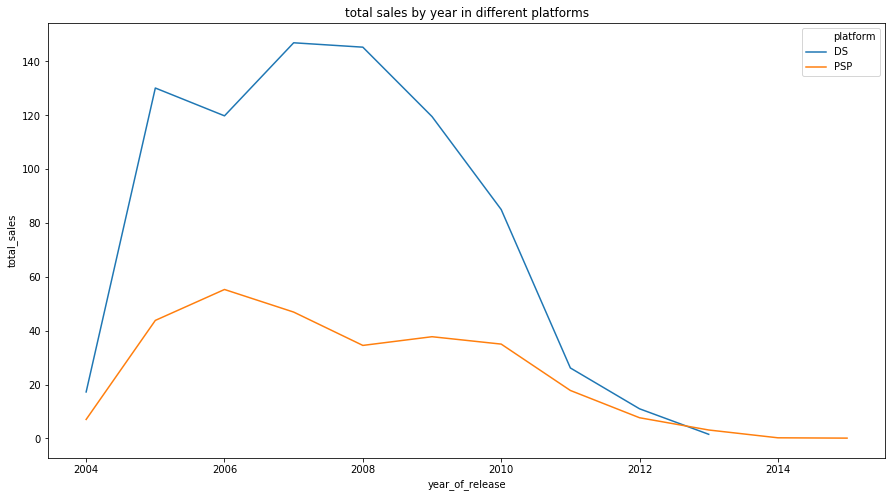

In [72]:
games_zero_ch=plat_gone.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index().sort_values(by='year_of_release')

plt.figure(figsize=(15,8))
ax = sns.lineplot(data=games_zero_ch, x='year_of_release', y='total_sales',hue="platform")
plt.title("total sales by year in different platforms")
plt.show()

- As the chart above shows each of these platforms was popular during a certain period in the last 16 years, and droped to zero sales later.  

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Nice
</div>

##### How long does it generally take for new platforms to appear and old ones to fade?

In [74]:
plat_age = games.groupby(['platform'])['year_of_release'].agg(['min','max'])
plat_age['age']=plat_age['max']-plat_age['min']
plat_age=plat_age.reset_index()
plat_age.sort_values(by='age')

,platform,min,max,age
9,GG,1992.000,1992.000,0.000
14,PCFX,1996.000,1996.000,0.000
24,TG16,1995.000,1995.000,0.000
1,3DO,1994.000,1995.000,1.000
22,SCD,1993.000,1994.000,1.000
25,WS,1999.000,2001.000,2.000
12,NG,1993.000,1996.000,3.000
30,XOne,2013.000,2016.000,3.000
18,PS4,2013.000,2016.000,3.000
8,GEN,1990.000,1994.000,4.000


In [75]:
print("Mean longevity of a console: ",plat_age['age'].mean())
print("Median longevity of a console: ",plat_age['age'].median())

Mean longevity of a console:  7.612903225806452
Median longevity of a console:  6.0


If all consoles are included:

- It usualy takes from 6 up to 7.6 years for a console to apear rech it's peak and fade away.

- Many consoles faded away quite fast, some lasting less then 1 year. 

In [76]:
#consoles still relevant today
plat_age_new = plat_age[plat_age['max'] > 2013] 
plat_age_new

,platform,min,max,age
2,3DS,2011.000,2016.000,5.000
13,PC,1985.000,2016.000,31.000
17,PS3,2006.000,2016.000,10.000
18,PS4,2013.000,2016.000,3.000
19,PSP,2004.000,2015.000,11.000
20,PSV,2011.000,2016.000,5.000
26,Wii,2006.000,2016.000,10.000
27,WiiU,2012.000,2016.000,4.000
28,X360,2005.000,2016.000,11.000
30,XOne,2013.000,2016.000,3.000


In [77]:
print("Mean longevity of a console: ",plat_age_new['age'].mean())
print("Median longevity of a console: ",plat_age_new['age'].median())

Mean longevity of a console:  9.3
Median longevity of a console:  7.5


The consoles still relevant today:

- There are a few that lasted much longer then the mean longevity, like the PC, PSP, Wii, PS3 and X360. 

- The consoles released after 2010, they are too new to judge about their longevity (mean longevity 6 so...). 

- It usualy takes from 6 up to 7.6 years for a console to apear rech it's peak and fade away.

- Many consoles faded away quite fast, some lasting less then 1 year.  

- There are a few though that lasted much longer, like the PC, PSP, Wii, PS3 and X360. 

- The consoles released after 2010, they are too new to judge about their longevity (mean longevity 6 so...). 

#### Which platforms are leading in sales?

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Let's look at the task again. 'Determine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a prognosis for 2017.' and 'Work only with the data that you've decided is relevant. Disregard the data for previous years.'.
    
So we need to determine relevant data and work with it. Let's take data from 2013 (year of release of new consoles).
    
Subsequent results may change after changing the period, so I will continue to check after your improvements. Good luck :)
</div>

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

Thank you for the feedback. I fixed all the requirements. 
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment 2</b> <a class="tocSkip"></a>

You are awesome!
</div>

In [79]:
plats=games_2013.groupby(['platform'])['total_sales'].agg(['sum','mean']).reset_index().sort_values(by='sum',ascending=False)
plats

,platform,sum,mean
4,PS4,314.140,0.801
3,PS3,181.430,0.526
10,XOne,159.320,0.645
0,3DS,143.250,0.473
9,X360,136.800,0.735
8,WiiU,64.630,0.562
2,PC,39.430,0.209
6,PSV,32.990,0.092
7,Wii,13.660,0.594
5,PSP,3.500,0.052


In [80]:
top=list(plats.head(5)['platform'])
top

['PS4', 'PS3', 'XOne', '3DS', 'X360']

The 5 most succesful gaming consoles are PS4, X360, PS3, XOne and 3DS

In [81]:
plat_top5=games.query('platform.isin(@top)')
plat_top5

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14,Kinect Adventures!,X360,2010.000,Misc,15.000,4.890,0.240,1.690,61.000,6.3,E,21.820
16,Grand Theft Auto V,PS3,2013.000,Action,7.020,9.090,0.980,3.960,97.000,8.2,M,21.050
23,Grand Theft Auto V,X360,2013.000,Action,9.660,5.140,0.060,1.410,97.000,8.1,M,16.270
29,Call of Duty: Modern Warfare 3,X360,2011.000,Shooter,9.040,4.240,0.130,1.320,88.000,3.4,M,14.730
31,Call of Duty: Black Ops 3,PS4,2015.000,Shooter,6.030,5.860,0.360,2.380,nan,NaN,TBD,14.630
...,...,...,...,...,...,...,...,...,...,...,...,...
16677,Aikatsu Stars! My Special Appeal,3DS,2016.000,Action,0.000,0.000,0.010,0.000,nan,NaN,TBD,0.010
16688,Outdoors Unleashed: Africa 3D,3DS,2011.000,Sports,0.010,0.000,0.000,0.000,nan,tbd,T,0.010
16691,Dynasty Warriors: Eiketsuden,PS3,2016.000,Action,0.000,0.000,0.010,0.000,nan,NaN,TBD,0.010
16710,Samurai Warriors: Sanada Maru,PS3,2016.000,Action,0.000,0.000,0.010,0.000,nan,NaN,TBD,0.010


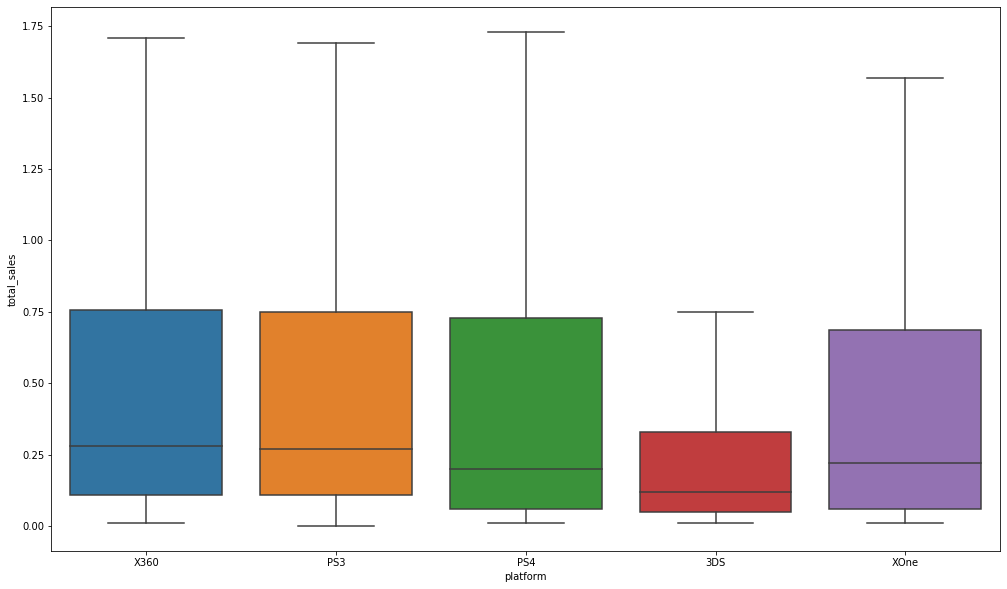

In [82]:
fig,ax=plt.subplots(figsize=(17,10))
ax=sns.boxplot(x="platform", y="total_sales", data=plat_top5, showfliers = False)

- As the boxplot shows the values of game sales on X360 and PS3 are (more or less) comparable, while all other top consoles show values a bit on any single video game (jodging by median).

- The upper whisker (Q3+1.5*IQR), is higher for XOne, PS3 and PS4. So these consoles have more outliers (that or just higher outliers) then the other two.  

- 3DS shows a smaller range of values and a lower median then the other consoles, it is prabably less profitable.

#### Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.

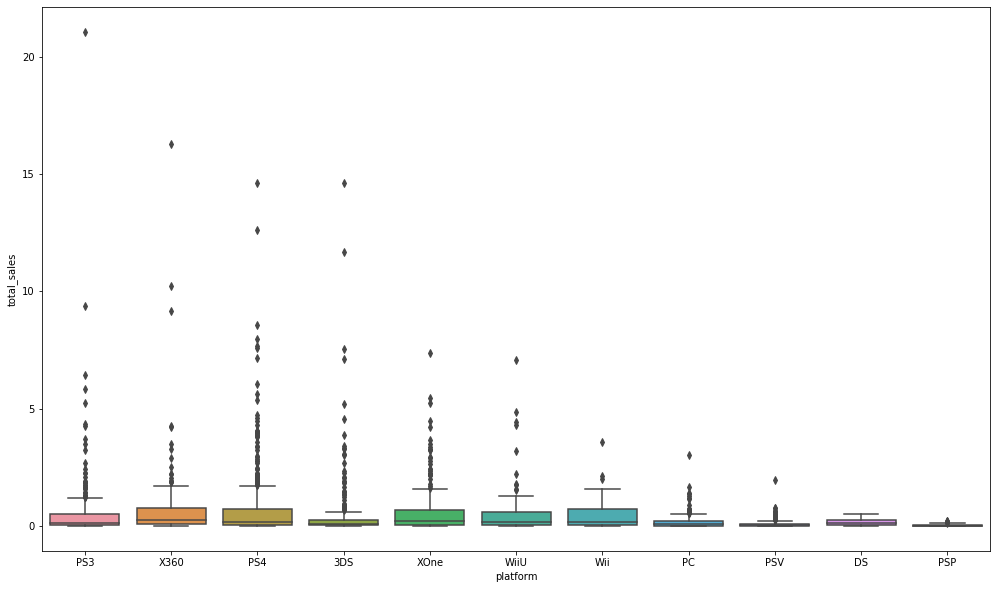

In [176]:
fig,ax=plt.subplots(figsize=(17,10))
ax=sns.boxplot(x="platform", y="total_sales", data=games_2013, showfliers = True)

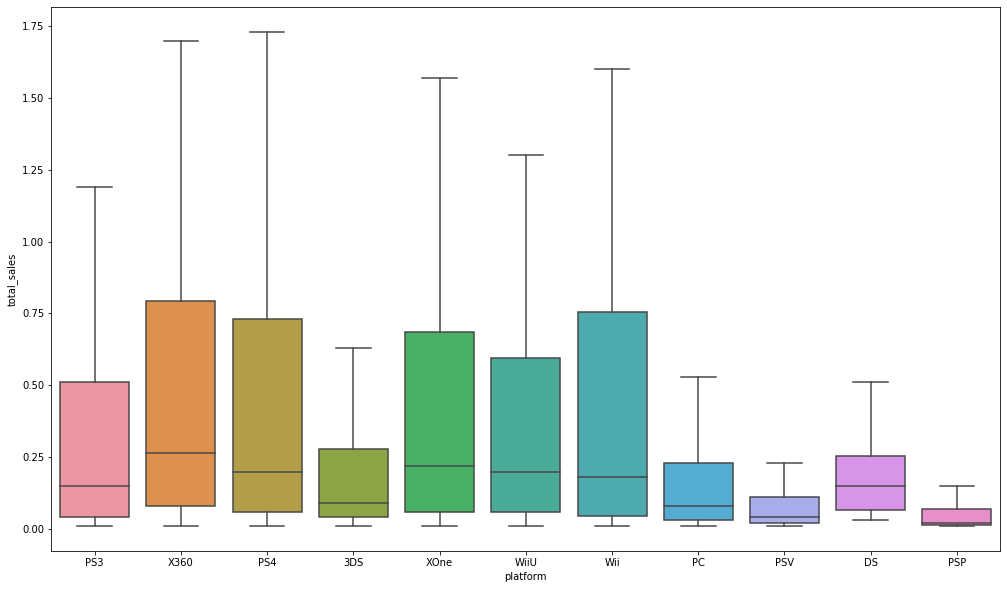

In [177]:
fig,ax=plt.subplots(figsize=(17,10))
ax=sns.boxplot(x="platform", y="total_sales", data=games_2013, showfliers = False)

In [181]:
games_2013.total_sales.describe()

count   2233.000
mean       0.488
std        1.235
min        0.010
25%        0.030
50%        0.110
75%        0.400
max       21.050
Name: total_sales, dtype: float64

In [182]:
plats.sort_values(by='mean', ascending=False).head()

,platform,sum,mean
4,PS4,314.140,0.801
9,X360,136.800,0.735
10,XOne,159.320,0.645
7,Wii,13.660,0.594
8,WiiU,64.630,0.562


In [184]:
plats.sort_values(by='mean', ascending=False).tail()

,platform,sum,mean
0,3DS,143.250,0.473
2,PC,39.430,0.209
1,DS,1.540,0.193
6,PSV,32.990,0.092
5,PSP,3.500,0.052


- Are the differences in sales significant?

Very significant with a minimum game sales at 0.01 sales (almost no one wanted to buy that game), up to 21.05 sales (wich is an outlier, but is important in understending the data) which is more then the sum of total sales for some platforms.

Also as the mean value is greater then Q3, it can be concluded that such singular sucsses (upper outliers) make a console sucssed or fail. 

A new game is more likely to succed on PS4, X360 or XOne.

- What about average sales on various platforms?

The average sales by mean are very different from 0.801 (PS4) down to 0.052 (PSP). The mean sales are very dependant on outliers as concluded before a singular sucssesful game can make a large change. 

If you go by median, median sales in PS4, X360, Wii, WiiU and XOne is higher then in other platforms.  

<div class="alert alert-block alert-success">
<b>Reviewer's comment 2</b> <a class="tocSkip"></a>

Great
</div>

#### Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.

In [185]:
games_user_clean = games_2013.query('user_score != "tbd"')
games_user_clean['user_score']=games_user_clean['user_score'].apply(lambda x: float(x))

In [186]:
box_360=games_user_clean.query('platform == "X360"')
box_360.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
23,Grand Theft Auto V,X360,2013.000,Action,9.660,5.140,0.060,1.410,97.000,8.100,M,16.270
60,Call of Duty: Ghosts,X360,2013.000,Shooter,6.730,2.560,0.040,0.910,73.000,2.600,M,10.240
72,Minecraft,X360,2013.000,Misc,5.700,2.650,0.020,0.810,nan,nan,TBD,9.180
263,Call of Duty: Advanced Warfare,X360,2014.000,Shooter,2.770,1.110,0.000,0.400,49.000,4.900,M,4.280
271,FIFA 14,X360,2013.000,Sports,0.920,2.890,0.010,0.400,84.000,4.200,E,4.220


In [187]:
box_360.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000,-0.208,-0.194,-0.279,-0.207,-0.398,-0.249,-0.210
na_sales,-0.208,1.000,0.866,0.636,0.985,0.236,-0.012,0.984
eu_sales,-0.194,0.866,1.000,0.614,0.934,0.227,-0.009,0.941
jp_sales,-0.279,0.636,0.614,1.000,0.644,0.288,0.113,0.651
other_sales,-0.207,0.985,0.934,0.644,1.000,0.237,-0.019,0.999
critic_score,-0.398,0.236,0.227,0.288,0.237,1.000,0.768,0.242
user_score,-0.249,-0.012,-0.009,0.113,-0.019,0.768,1.000,-0.012
total_sales,-0.210,0.984,0.941,0.651,0.999,0.242,-0.012,1.000


In [188]:
box_360_scatter = box_360[['year_of_release','critic_score', 'user_score', 'total_sales']]  

#sns.pairplot(box_360_scatter)
#plt.show()

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

We can add an alpha parameter here to make our dots translucent.
</div>

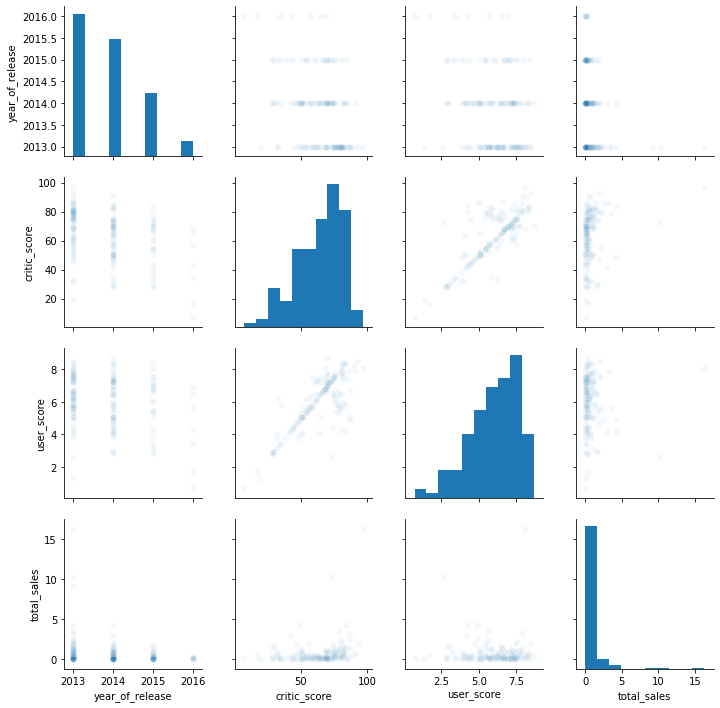

In [189]:
# Reviewer's code
sns.pairplot(box_360_scatter, plot_kws={'alpha': 0.05})
plt.show()

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

Thank you for the tip for the plotly, I will implement this going forward.
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment 2</b> <a class="tocSkip"></a>

👍
</div>

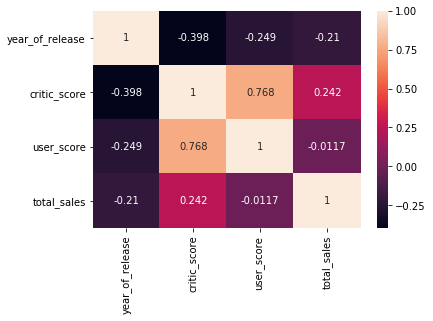

In [190]:
sns.heatmap(box_360_scatter.corr(), annot = True, fmt='.3g')
plt.show()

<div class="alert alert-block alert-success">
<b>Reviewer's comment 2</b> <a class="tocSkip"></a>

Nice heatmap
</div>

In [191]:
box_360_scatter.corr()

,year_of_release,critic_score,user_score,total_sales
year_of_release,1.000,-0.398,-0.249,-0.210
critic_score,-0.398,1.000,0.768,0.242
user_score,-0.249,0.768,1.000,-0.012
total_sales,-0.210,0.242,-0.012,1.000


Conclusions:

- There is a very strong correlation between user score and critic score. Which means that the critics opinions influence the common users, or critics are influenced by public opinion (or both).

- There is a very weak positive correletion between critic score and sales, which sugest there is some probibility of a conection between the two. Games better critic score may have better sales then others.

- There is a weak negative correlation between score (user and critic) and year of relese, which sugests that people are harder to please with the advance of time (also nostalgia factor). Newer games may have a lower score.

#### Compare the sales of the same game on other platforms.

In [192]:
games_2013['name'].value_counts()

FIFA 14                                                       9
LEGO Marvel Super Heroes                                      9
FIFA 15                                                       8
LEGO Jurassic World                                           8
The LEGO Movie Videogame                                      8
                                                             ..
Amnesia Crowd                                                 1
Hyperdimension Neptunia Re;Birth 3                            1
Atelier Meruru: Alchemist of Arland 3                         1
Renai 0 Kilometer                                             1
2 in 1 Combo Pack: Sonic Heroes / Super Monkey Ball Deluxe    1
Name: name, Length: 1263, dtype: int64

In [194]:
game_name = games_2013.name.value_counts().loc[lambda x: x>4].index
game_name

Index(['FIFA 14', 'LEGO Marvel Super Heroes', 'FIFA 15', 'LEGO Jurassic World',
       'The LEGO Movie Videogame', 'LEGO The Hobbit', 'Angry Birds Star Wars',
       'Lego Batman 3: Beyond Gotham', 'LEGO Marvel's Avengers',
       'Skylanders: Trap Team', 'The Amazing Spider-Man 2 (2014)', 'Terraria',
       'Lego Star Wars: The Force Awakens', 'Skylanders: SuperChargers',
       'Skylanders SWAP Force', 'Disney Infinity 2.0: Marvel Super Heroes',
       'Adventure Time: Finn & Jake Investigations', 'Rugby World Cup 2015',
       'Minecraft', 'Disney Infinity', 'Just Dance 2017', 'Just Dance 2016',
       'Turbo: Super Stunt Squad', 'Just Dance 2014', 'Call of Duty: Ghosts',
       'Watch Dogs', 'Rayman Legends', 'Just Dance 2015',
       'Assassin's Creed IV: Black Flag',
       'Transformer: Rise of the Dark Spark', 'Minecraft: Story Mode',
       'LEGO Dimensions', 'Rocksmith 2014', 'Battlefield: Hardline',
       'Pro Evolution Soccer 2016', 'Call of Duty: Advanced Warfare',
      

In [195]:
wno=games.query('name == "Wolfenstein: The New Order"')
wno                

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1208,Wolfenstein: The New Order,PS4,2014.000,Shooter,0.470,0.800,0.030,0.240,79.000,8.1,M,1.540
2991,Wolfenstein: The New Order,XOne,2014.000,Shooter,0.340,0.280,0.000,0.060,79.000,7.8,M,0.680
4364,Wolfenstein: The New Order,PC,2014.000,Shooter,0.130,0.290,0.000,0.030,81.000,8.2,M,0.450
4391,Wolfenstein: The New Order,PS3,2014.000,Shooter,0.140,0.210,0.020,0.070,71.000,7.1,M,0.440
4995,Wolfenstein: The New Order,X360,2014.000,Shooter,0.180,0.170,0.000,0.030,74.000,7.4,M,0.380


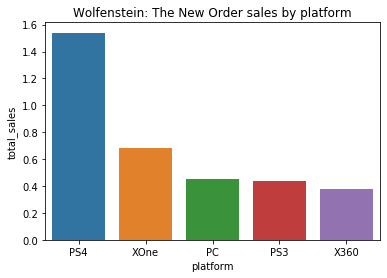

count   5.000
mean    0.698
std     0.484
min     0.380
25%     0.440
50%     0.450
75%     0.680
max     1.540
Name: total_sales, dtype: float64


In [196]:
sns.barplot(x='platform', y='total_sales', data=wno)
plt.title("Wolfenstein: The New Order sales by platform")
plt.show()
print(wno.total_sales.describe())

- The chart shows that sells differ greatly over consoles (from 0.38 up to 1.54).
- PS4 game sales are much higher then on other consoles.
- X360 sales are low (0.38) compered to the mean sale values.

In [197]:
pro = games.query('name == "Pro Evolution Soccer 2016"')
pro

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
2600,Pro Evolution Soccer 2016,PS4,2015.000,Sports,0.130,0.420,0.130,0.100,87.000,7.1,E,0.780
4836,Pro Evolution Soccer 2016,PS3,2015.000,Sports,0.090,0.120,0.150,0.040,72.000,7.2,E,0.400
10343,Pro Evolution Soccer 2016,XOne,2015.000,Sports,0.040,0.060,0.000,0.010,85.000,6.2,E,0.110
10745,Pro Evolution Soccer 2016,X360,2015.000,Sports,0.040,0.050,0.000,0.010,70.000,7,E,0.100
13559,Pro Evolution Soccer 2016,PC,2015.000,Sports,0.000,0.040,0.000,0.000,76.000,4.3,E,0.040


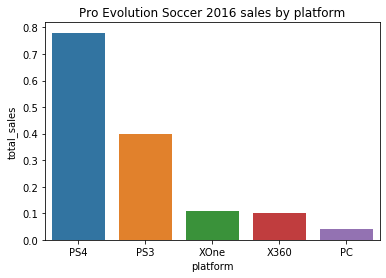

count   5.000
mean    0.286
std     0.309
min     0.040
25%     0.100
50%     0.110
75%     0.400
max     0.780
Name: total_sales, dtype: float64


In [198]:
sns.barplot(x='platform', y='total_sales', data=pro)
plt.title("Pro Evolution Soccer 2016 sales by platform")
plt.show()
print(pro.total_sales.describe())

- This chart also shows that sells differ greatly over consoles (from 0.04 up to 0.78).
- PS4 game sales are again much higher then on other consoles.
- PC sales are very low (0.04) compered to the mean and median sale values.

In [199]:
lego = games.query('name == "LEGO Marvel Super Heroes"')
lego

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
730,LEGO Marvel Super Heroes,X360,2013.000,Action,1.240,0.790,0.000,0.190,80.000,7.6,E10+,2.220
945,LEGO Marvel Super Heroes,PS3,2013.000,Action,0.770,0.760,0.010,0.290,82.000,7.9,E10+,1.830
1139,LEGO Marvel Super Heroes,PS4,2013.000,Action,0.590,0.760,0.010,0.260,83.000,7.7,E10+,1.620
1959,LEGO Marvel Super Heroes,XOne,2013.000,Action,0.610,0.350,0.000,0.090,68.000,6.8,E10+,1.050
2313,LEGO Marvel Super Heroes,3DS,2013.000,Action,0.420,0.360,0.040,0.070,61.000,5.2,E10+,0.890
2778,LEGO Marvel Super Heroes,WiiU,2013.000,Action,0.310,0.350,0.020,0.060,82.000,8,E10+,0.740
3876,LEGO Marvel Super Heroes,PSV,2013.000,Action,0.110,0.290,0.000,0.110,nan,NaN,TBD,0.510
5054,LEGO Marvel Super Heroes,DS,2013.000,Action,0.220,0.130,0.000,0.030,48.000,4.8,E10+,0.380
8369,LEGO Marvel Super Heroes,PC,2013.000,Action,0.040,0.120,0.000,0.010,78.000,8.1,E10+,0.170


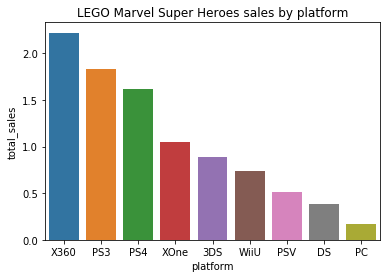

count   9.000
mean    1.046
std     0.702
min     0.170
25%     0.510
50%     0.890
75%     1.620
max     2.220
Name: total_sales, dtype: float64


In [200]:
sns.barplot(x='platform', y='total_sales', data=lego)
plt.title("LEGO Marvel Super Heroes sales by platform")
plt.show()
print(lego.total_sales.describe())

- This chart also shows that sells differ greatly over consoles (from 0.17 up to 2.22), but less then the previous two.
- X360 game sales are much higher then on other consoles, this time. With PS3 and PS4 also performing very well.
- PC sales are very low (0.03) compered to the mean and median sale values.

conclusions for the same game on differant consoles:

- game sells of the same game differ greatly over consoles.
- PS4 sales are better then average, in the gamea checked.
- PC sales are average or worse then average. 

<div class="alert alert-block alert-success">
<b>Reviewer's comment 2</b> <a class="tocSkip"></a>

Right conclusion
</div>

#### Take a look at the general distribution of games by genre. What can we say about the most profitable genres? 

In [201]:
game_genre=games_2013[['genre','total_sales']].groupby(['genre']).sum().sort_values(by='total_sales', ascending=False).reset_index()
game_genre

,genre,total_sales
0,Action,321.870
1,Shooter,232.980
2,Sports,150.650
3,Role-Playing,145.890
4,Misc,62.820
5,Platform,42.630
6,Racing,39.890
7,Fighting,35.310
8,Adventure,23.640
9,Simulation,21.760


In [205]:
top=list(game_genre.head(5)['genre'])
top

['Shooter', 'Sports', 'Platform', 'Role-Playing', 'Racing']

In [202]:
game_genre=games_2013[['genre','total_sales']].groupby(['genre']).median().sort_values(by='total_sales', ascending=False).reset_index()
game_genre

,genre,total_sales
0,Shooter,0.450
1,Sports,0.240
2,Platform,0.225
3,Role-Playing,0.125
4,Fighting,0.125
5,Racing,0.120
6,Action,0.110
7,Simulation,0.100
8,Misc,0.100
9,Strategy,0.080


In [206]:
top=list(game_genre.head(5)['genre'])
top

['Shooter', 'Sports', 'Platform', 'Role-Playing', 'Racing']

In [203]:
game_genre=games_2013[['genre','total_sales']].groupby(['genre']).mean().sort_values(by='total_sales', ascending=False).reset_index()
game_genre

,genre,total_sales
0,Shooter,1.246
1,Sports,0.704
2,Platform,0.576
3,Role-Playing,0.500
4,Racing,0.469
5,Fighting,0.441
6,Action,0.420
7,Misc,0.405
8,Simulation,0.351
9,Puzzle,0.186


In [207]:
top=list(game_genre.head(5)['genre'])
top

['Shooter', 'Sports', 'Platform', 'Role-Playing', 'Racing']

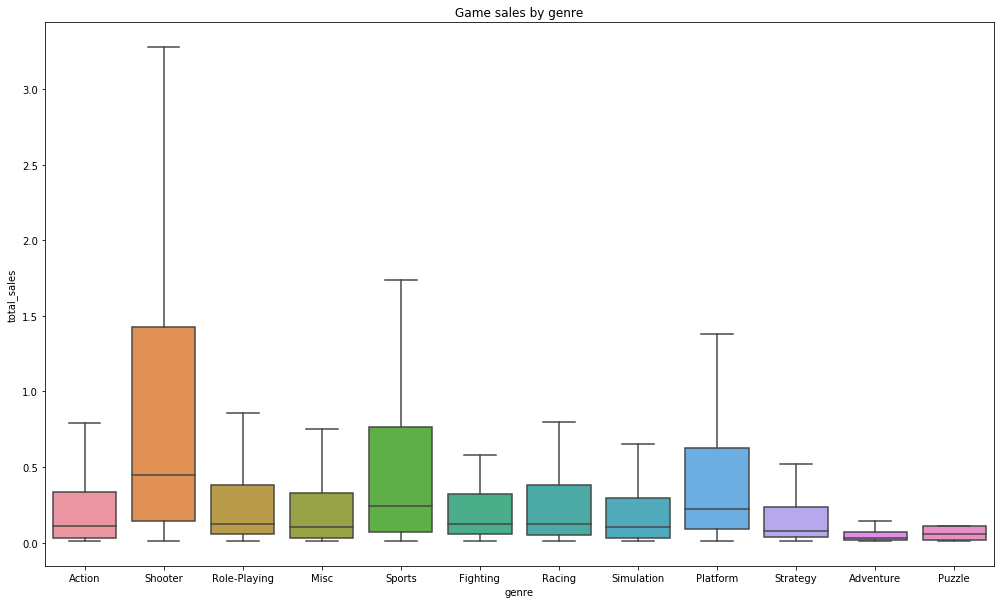

In [204]:
fig,ax=plt.subplots(figsize=(17,10))
ax=sns.boxplot(x="genre", y="total_sales", data=games_2013, showfliers = False)
plt.title("Game sales by genre")
plt.show()

- The 5 most profitable genres by total sales are shooter, sports, platform, role-playing, and Racing. Theyare also the most profitable by median and median value of sales .

- So a new game is more likely to sale well if it's in one of these genres. 

#### Analysis conclusions 

The general conclusions are:

- 	After 2008 there is a declining trend which reaches a low of 502 sales in 2016, this number of sales is the lowest from 2002.
-	The years 2008, 2009 and 2010 amount to more than a quarter of the sales (26% of the sales), further more in the range of five years (2007-2011) 40% of all sales were made, as can be seen in the pie chart. And those were the most successful years in sales.
-	The most successful of the consoles is PS2, while PCFX is the least successful. The 5 most successful gaming consoles are PS2, X360, PS3, Wii and DS. Two consoles PS2 and X360 can account for about 25% of total game sales.
-	It usually takes from 6 up to 7.6 years for a console to appear reach its peak and fade away. But are a few though that lasted much longer, like the PC, DS, Wii, PS3 and X360. 
-	There is a very strong correlation between user score and critic score.  There is a weak positive correlation between critic score and sales, which suggests there is some probability of a connection between the two. Games better critic score may have better sales then others.
-	There is also a weak negative correlation between user score and year of release, which suggests that users are harder to please with the advance of time. Newer games may have lower user score.
- Game sells of the same game may differ greatly over consoles. 
-	The 5 most profitable genres by total sales are Action, Sports, Shooter, Role-Playing and Misc. 

If only data after 2013 (relese of the new consoles) is considred:  

- The 5 most successful gaming consoles by z-score (positive) in the relevant time period are PS4, X360, PS3, XOne and 3DS.  There are a few that lasted much longer than the mean longevity, like the PC, PSP, Wii, PS3 and X360. The consoles released after 2010, are too new to judge about their longevity (general mean longevity 6 so...).
- Very significant diferances in console sales with a minimum game sale at 0.01 sales (almost no one wanted to buy that game), up to 21.05 sales (which is an A new game is more likely to succeed on PS4, X360 or XOne.
- The average sales by mean are very different from 0.801 (PS4) down to 0.052 (PSP). The mean sales are very dependent on outliers as concluded before a singular successful game can make a large change. If you go by median, median sales in PS4, X360, Wii, WiiU and XOne is higher than in other platforms.  
- There is a very strong correlation between user score and critic score. Which means that the critics opinions influence the common users, or critics are influenced by public opinion (or both).
- There is a very weak positive correletion between critic score and sales, which sugest there is some probibility of a conection between the two. Games better critic score may have better sales then others.
- There is a weak negative correlation between score (user and critic) and year of relese, which sugests that people are harder to please with the advance of time (also posible nostalgia factor). Newer games may have a lower score.


<div class="alert alert-block alert-success">
<b>Reviewer's comment 2</b> <a class="tocSkip"></a>

That is very informative conclusion. Perfect!
</div>

### Create a user profile for each region

#### The top five platforms. Describe variations in their market shares from region to region.

In [112]:
na_region=games_2013.groupby(['platform'])['na_sales'].sum().reset_index().sort_values(by='na_sales',ascending=False).head()
na_region

,platform,na_sales
4,PS4,108.740
10,XOne,93.120
9,X360,81.660
3,PS3,63.500
0,3DS,38.200


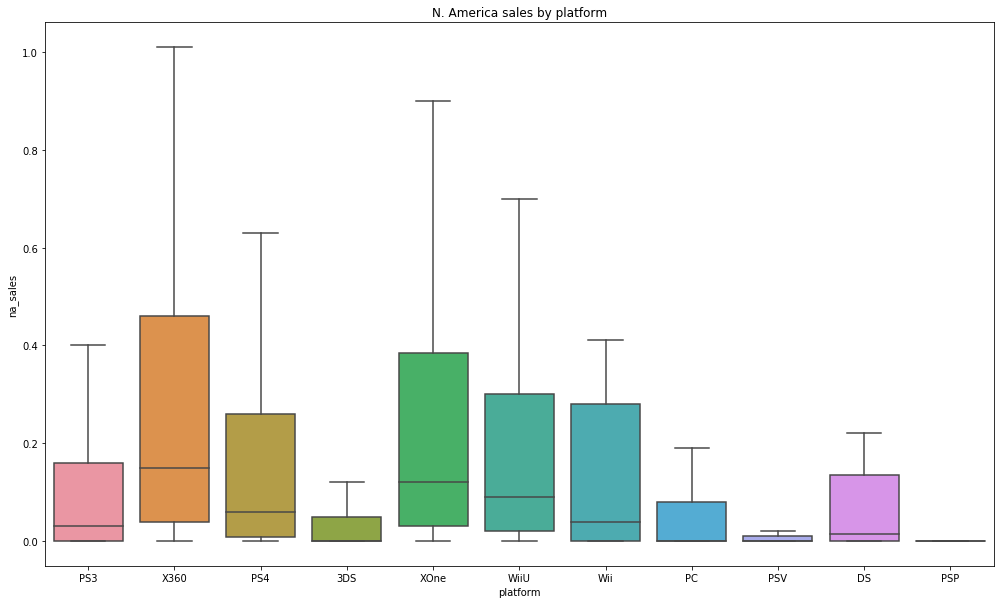

In [114]:
fig,ax=plt.subplots(figsize=(17,10))
ax=sns.boxplot(x="platform", y="na_sales", data=games_2013, showfliers = False)
plt.title("N. America sales by platform")
plt.show()

In [119]:
top=list(na_region.head(5)['platform'])
top

['PS4', 'XOne', 'X360', 'PS3', '3DS']

In [120]:
eu_region=games_2013.groupby(['platform'])['eu_sales'].sum().reset_index().sort_values(by='eu_sales',ascending=False).head()
eu_region

,platform,eu_sales
4,PS4,141.090
3,PS3,67.810
10,XOne,51.590
9,X360,42.520
0,3DS,30.960


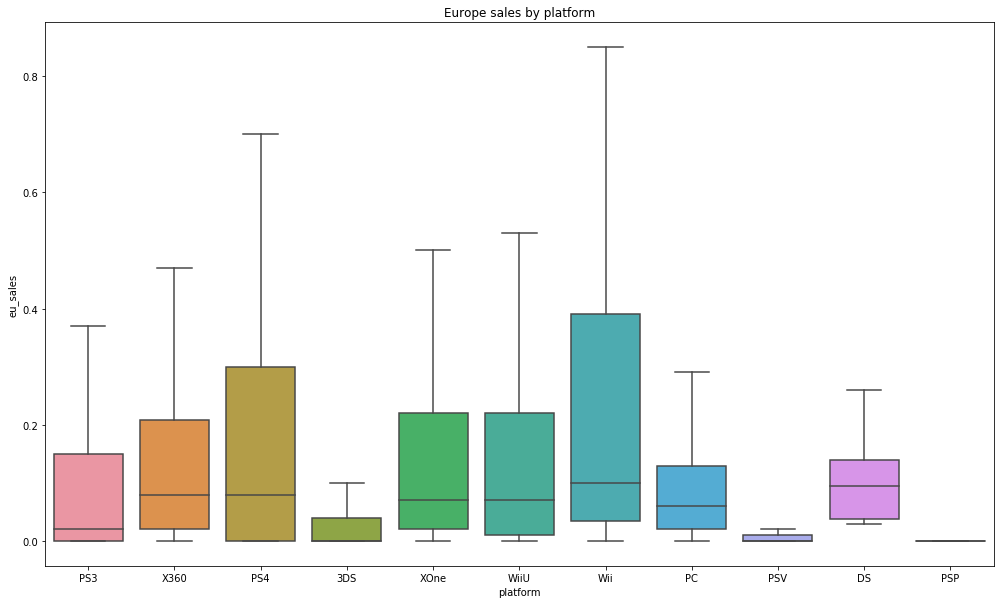

In [121]:
fig,ax=plt.subplots(figsize=(17,10))
ax=sns.boxplot(x="platform", y="eu_sales", data=games_2013, showfliers = False)
plt.title("Europe sales by platform")
plt.show()

In [122]:
top=list(eu_region.head(5)['platform'])
top

['PS4', 'PS3', 'XOne', 'X360', '3DS']

In [123]:
jp_region=games_2013.groupby(['platform'])['jp_sales'].sum().reset_index().sort_values(by='jp_sales',ascending=False).head()
jp_region

,platform,jp_sales
0,3DS,67.810
3,PS3,23.350
6,PSV,18.590
4,PS4,15.960
8,WiiU,10.880


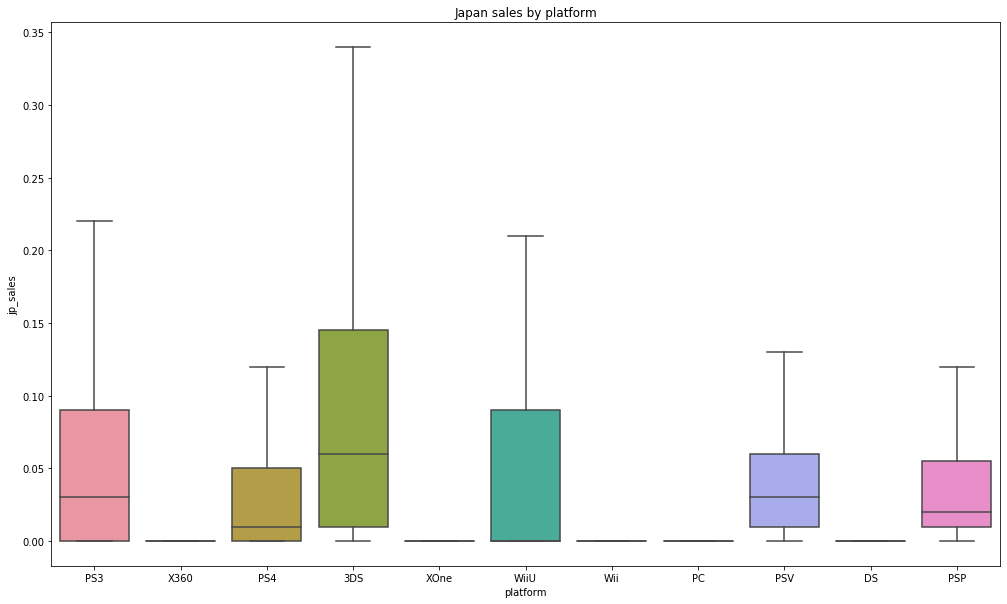

In [135]:
fig,ax=plt.subplots(figsize=(17,10))
ax=sns.boxplot(x="platform", y="jp_sales", data=games_2013, showfliers = False)
plt.title("Japan sales by platform")
plt.show()

In [136]:
top=list(jp_region.head(5)['platform'])
top

['3DS', 'PS3', 'PSV', 'PS4', 'WiiU']

In [137]:
other_region=games_2013.groupby(['platform'])['other_sales'].sum().reset_index().sort_values(by='other_sales',ascending=False).head()
other_region

,platform,other_sales
4,PS4,48.350
3,PS3,26.770
10,XOne,14.270
9,X360,12.110
0,3DS,6.280


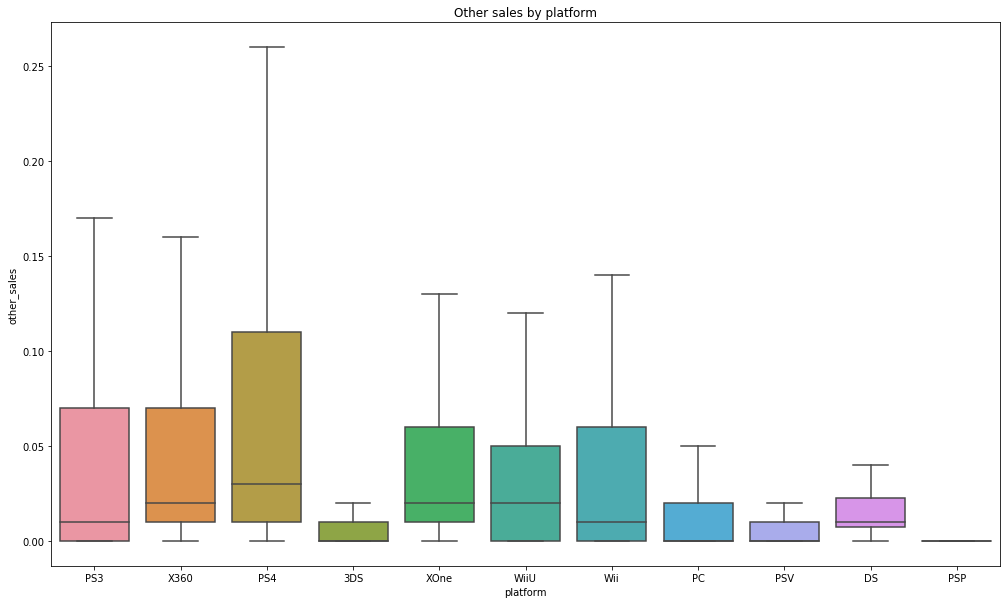

In [138]:
fig,ax=plt.subplots(figsize=(17,10))
ax=sns.boxplot(x="platform", y="other_sales", data=games_2013, showfliers = False)
plt.title("Other sales by platform")
plt.show()

In [139]:
top=list(other_region.head(5)['platform'])
top

['PS4', 'PS3', 'XOne', 'X360', '3DS']

In [211]:
total_region=games_2013.groupby(['platform'])['total_sales'].sum().reset_index().sort_values(by='total_sales',ascending=False).head()
total_region

,platform,total_sales
4,PS4,314.140
3,PS3,181.430
10,XOne,159.320
0,3DS,143.250
9,X360,136.800


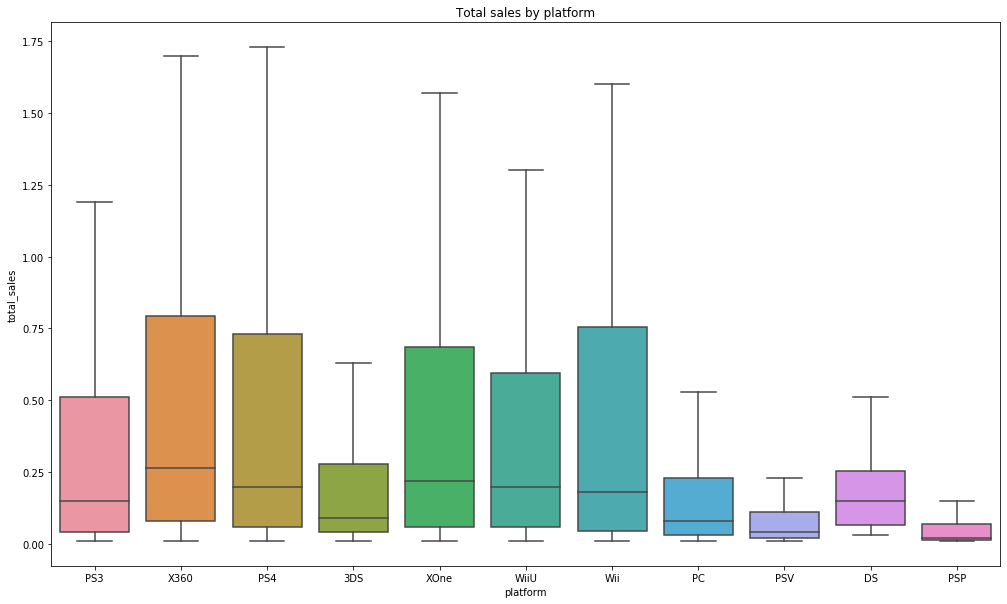

In [212]:
fig,ax=plt.subplots(figsize=(17,10))
ax=sns.boxplot(x="platform", y="total_sales", data=games_2013, showfliers = False)
plt.title("Total sales by platform")
plt.show()

In [213]:
top=list(total_region.head(5)['platform'])
top

['PS4', 'PS3', 'XOne', '3DS', 'X360']

- The top 5 consoles are the same in all regions, exept Japan.

- Japan is very different in it's preferance of consoles (PSV and WiiU, preformed much better then X360 and XOne, in Japan) 

#### The top five genres. Explain the difference.

In [140]:
na_region=games_2013.groupby(['genre'])['na_sales'].sum().reset_index().sort_values(by='na_sales',ascending=False).head()
na_region

,genre,na_sales
0,Action,126.050
8,Shooter,109.740
10,Sports,65.270
7,Role-Playing,46.400
3,Misc,27.490


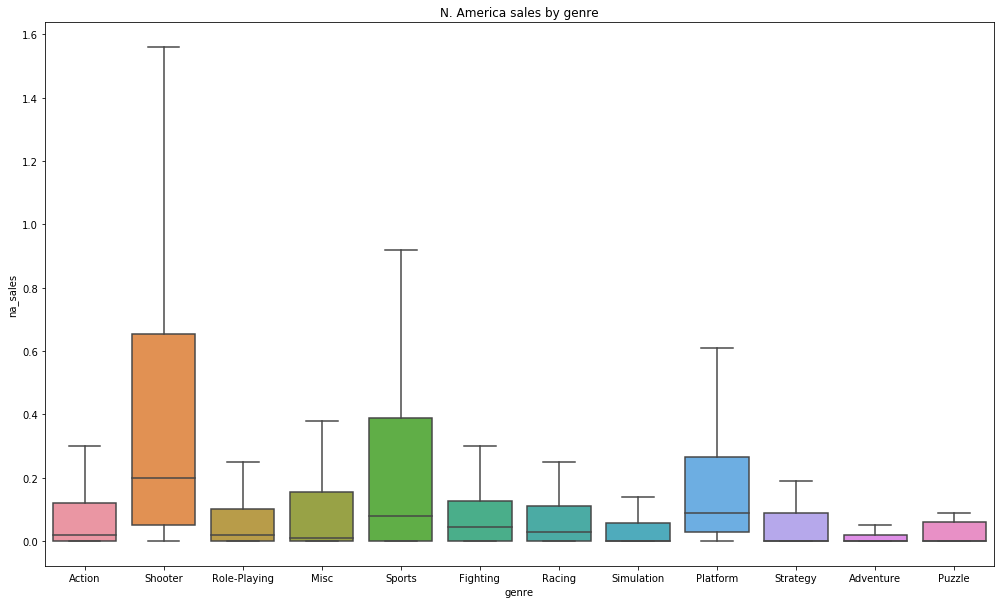

In [141]:
fig,ax=plt.subplots(figsize=(17,10))
ax=sns.boxplot(x="genre", y="na_sales", data=games_2013, showfliers = False)
plt.title("N. America sales by genre")
plt.show()

In [143]:
top=list(na_region.head(5)['genre'])
top

['Action', 'Shooter', 'Sports', 'Role-Playing', 'Misc']

In [144]:
eu_region=games_2013.groupby(['genre'])['eu_sales'].sum().reset_index().sort_values(by='eu_sales',ascending=False).head()
eu_region

,genre,eu_sales
0,Action,118.130
8,Shooter,87.860
10,Sports,60.520
7,Role-Playing,36.970
6,Racing,20.190


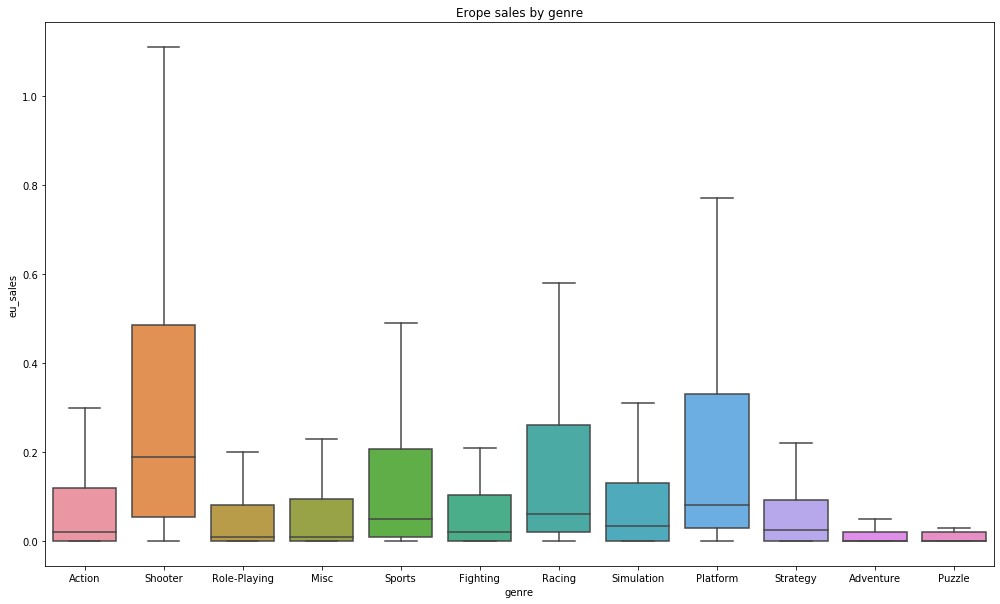

In [145]:
fig,ax=plt.subplots(figsize=(17,10))
ax=sns.boxplot(x="genre", y="eu_sales", data=games_2013, showfliers = False)
plt.title("Erope sales by genre")
plt.show()

In [146]:
top=list(eu_region.head(5)['genre'])
top

['Action', 'Shooter', 'Sports', 'Role-Playing', 'Racing']

In [147]:
jp_region=games_2013.groupby(['genre'])['jp_sales'].sum().reset_index().sort_values(by='jp_sales',ascending=False).head()
jp_region

,genre,jp_sales
7,Role-Playing,51.040
0,Action,40.490
3,Misc,9.200
2,Fighting,7.650
8,Shooter,6.610


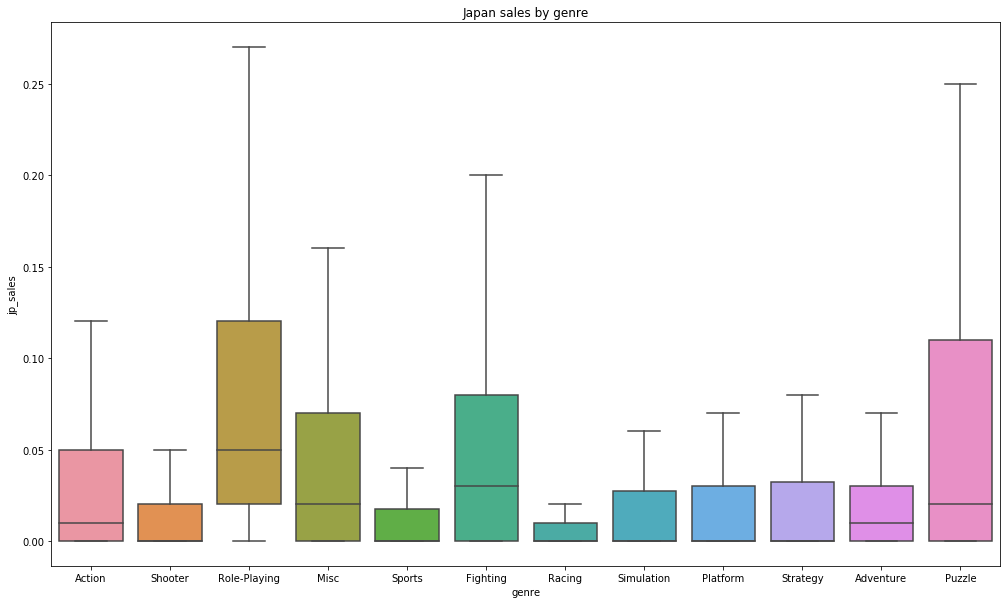

In [149]:
fig,ax=plt.subplots(figsize=(17,10))
ax=sns.boxplot(x="genre", y="jp_sales", data=games_2013, showfliers = False)
plt.title("Japan sales by genre")
plt.show()

In [150]:
top=list(jp_region.head(5)['genre'])
top

['Role-Playing', 'Action', 'Misc', 'Fighting', 'Shooter']

In [151]:
other_region=games_2013.groupby(['genre'])['other_sales'].sum().reset_index().sort_values(by='other_sales',ascending=False).head()
other_region

,genre,other_sales
0,Action,37.200
8,Shooter,28.770
10,Sports,19.450
7,Role-Playing,11.480
3,Misc,6.090


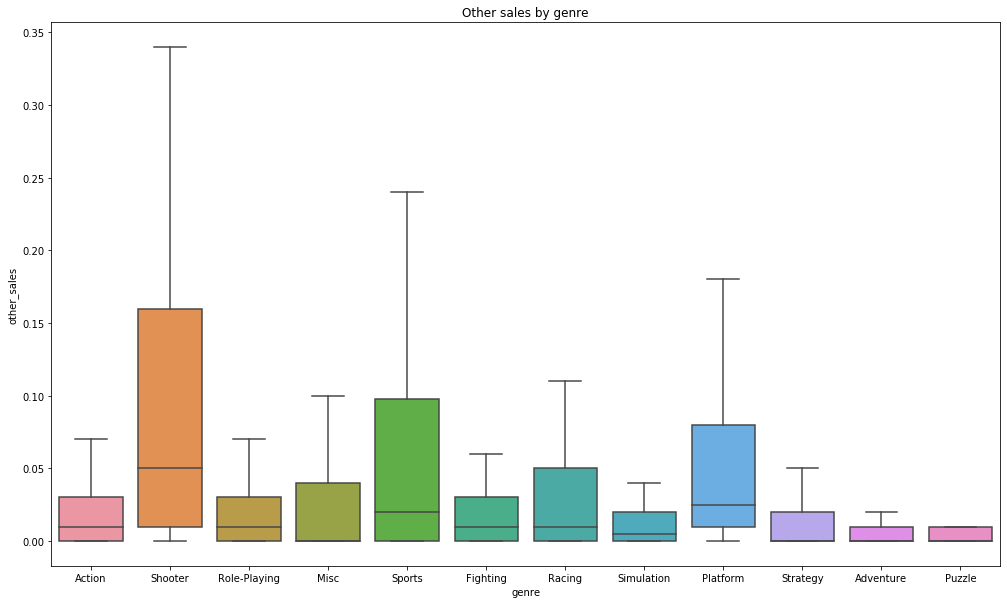

In [153]:
fig,ax=plt.subplots(figsize=(17,10))
ax=sns.boxplot(x="genre", y="other_sales", data=games_2013, showfliers = False)
plt.title("Other sales by genre")
plt.show()

In [154]:
top=list(other_region.head(5)['genre'])
top

['Action', 'Shooter', 'Sports', 'Role-Playing', 'Misc']

In [208]:
total_region=games_2013.groupby(['genre'])['total_sales'].sum().reset_index().sort_values(by='total_sales',ascending=False).head()
total_region

,genre,total_sales
0,Action,321.870
8,Shooter,232.980
10,Sports,150.650
7,Role-Playing,145.890
3,Misc,62.820


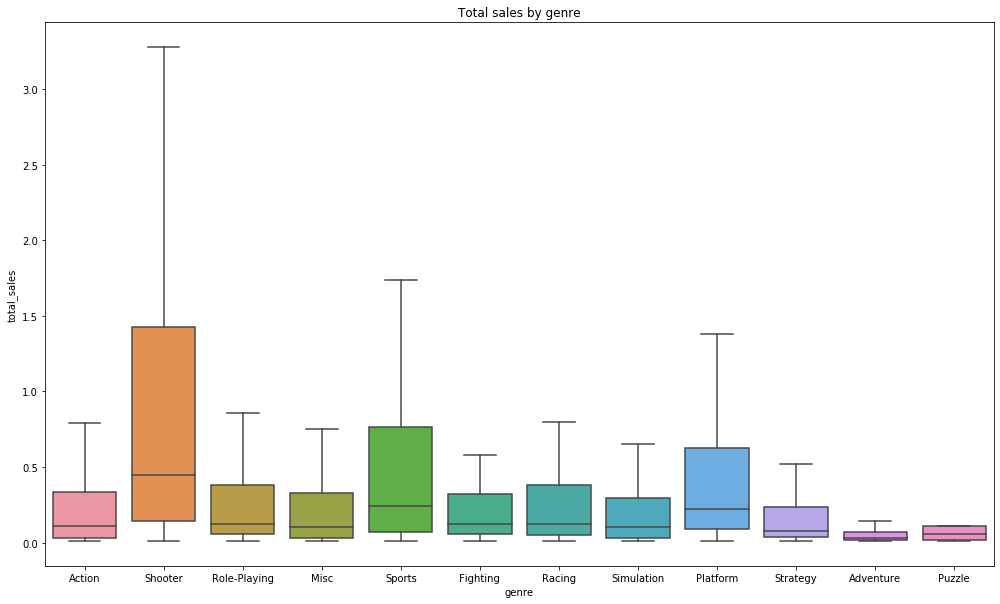

In [209]:
fig,ax=plt.subplots(figsize=(17,10))
ax=sns.boxplot(x="genre", y="total_sales", data=games_2013, showfliers = False)
plt.title("Total sales by genre")
plt.show()

In [210]:
top=list(total_region.head(5)['genre'])
top

['Action', 'Shooter', 'Sports', 'Role-Playing', 'Misc']

- All regions like action, shoter and role-playing games 

- All but Japan like sports games.

- All but Europeans like Misc games.

- People from Japan like fighting games.

- People from Europe like racing games.
   

<div class="alert alert-block alert-success">
<b>Reviewer's comment 2</b> <a class="tocSkip"></a>

You are right
</div>

#### Do ESRB ratings affect sales in individual regions?

In [155]:
games1 = games_2013.query('rating != "TBD"')

In [156]:
na_region=games1.groupby(['rating'])['na_sales'].sum().reset_index().sort_values(by='na_sales',ascending=False).head()
na_region

,rating,na_sales
2,M,165.210
0,E,79.050
1,E10+,54.240
3,T,49.790


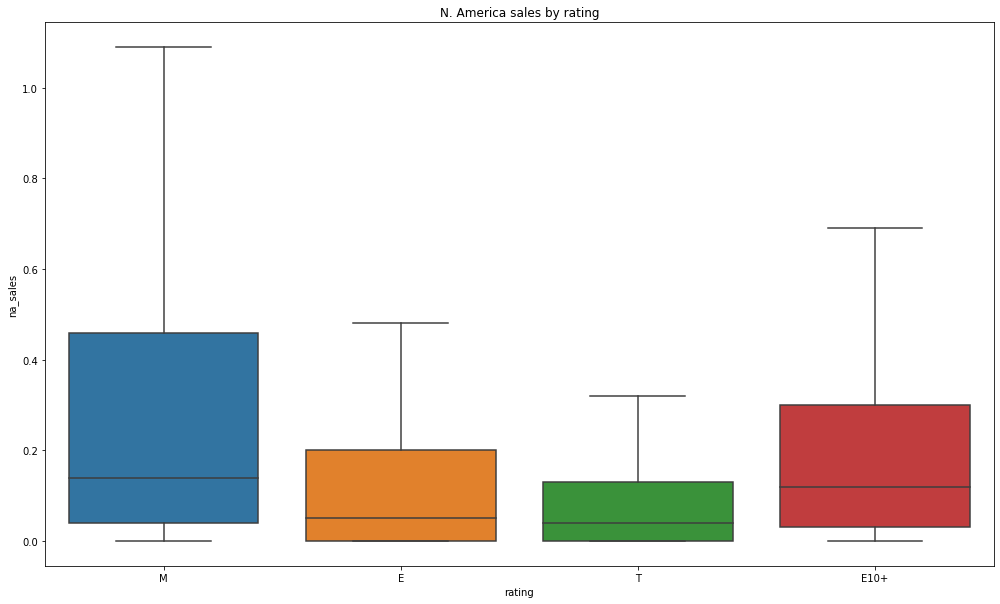

In [157]:
fig,ax=plt.subplots(figsize=(17,10))
ax=sns.boxplot(x="rating", y="na_sales", data=games1, showfliers = False)
plt.title("N. America sales by rating")
plt.show()

In [164]:
top=list(na_region.head(1)['rating'])
top

['M']

In [159]:
eu_region=games1.groupby(['rating'])['eu_sales'].sum().reset_index().sort_values(by='eu_sales',ascending=False).head()
eu_region

,rating,eu_sales
2,M,145.320
0,E,83.360
1,E10+,42.690
3,T,41.950


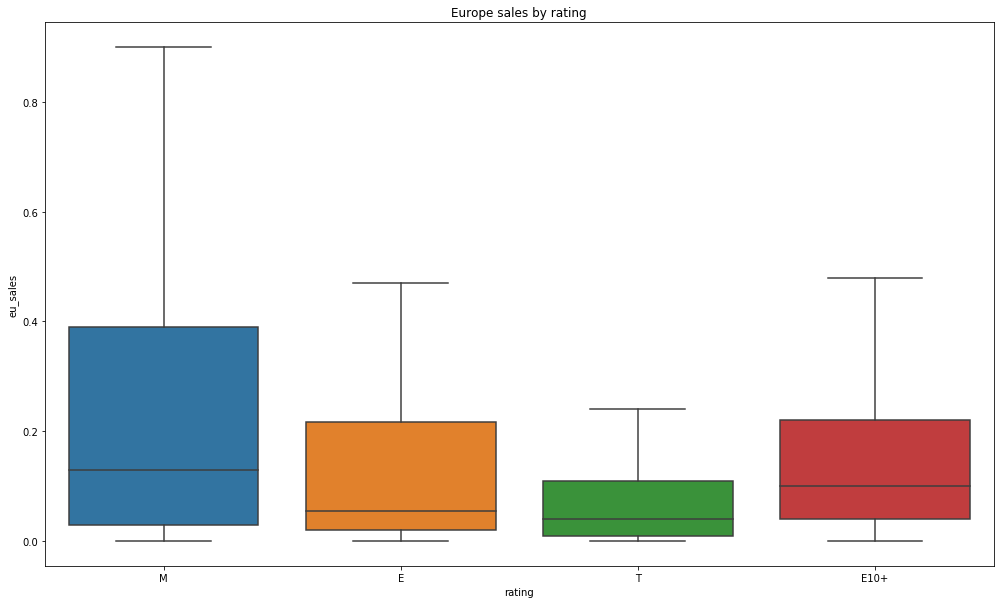

In [160]:
fig,ax=plt.subplots(figsize=(17,10))
ax=sns.boxplot(x="rating", y="eu_sales", data=games1, showfliers = False)
plt.title("Europe sales by rating")
plt.show()

In [165]:
top=list(eu_region.head(1)['rating'])
top

['M']

In [162]:
jp_region=games1.groupby(['rating'])['jp_sales'].sum().reset_index().sort_values(by='jp_sales',ascending=False).head()
jp_region

,rating,jp_sales
3,T,20.590
0,E,15.140
2,M,14.110
1,E10+,5.890


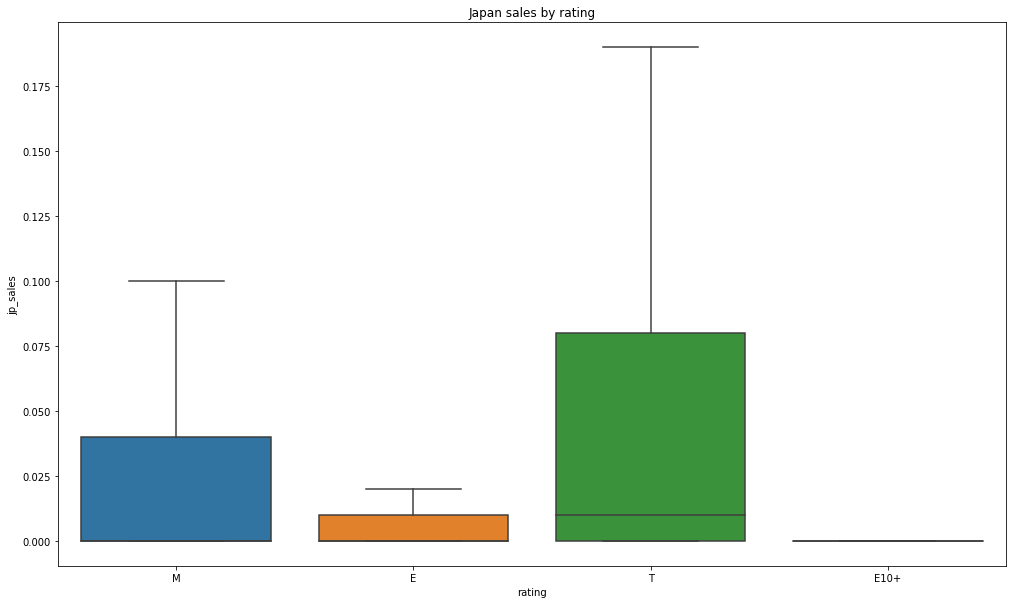

In [163]:
fig,ax=plt.subplots(figsize=(17,10))
ax=sns.boxplot(x="rating", y="jp_sales", data=games1, showfliers = False)
plt.title("Japan sales by rating")
plt.show()

In [167]:
top=list(jp_region.head(1)['rating'])
top

['T']

In [168]:
other_region=games1.groupby(['rating'])['other_sales'].sum().reset_index().sort_values(by='other_sales',ascending=False).head()
other_region

,rating,other_sales
2,M,47.040
0,E,22.610
3,T,14.290
1,E10+,12.570


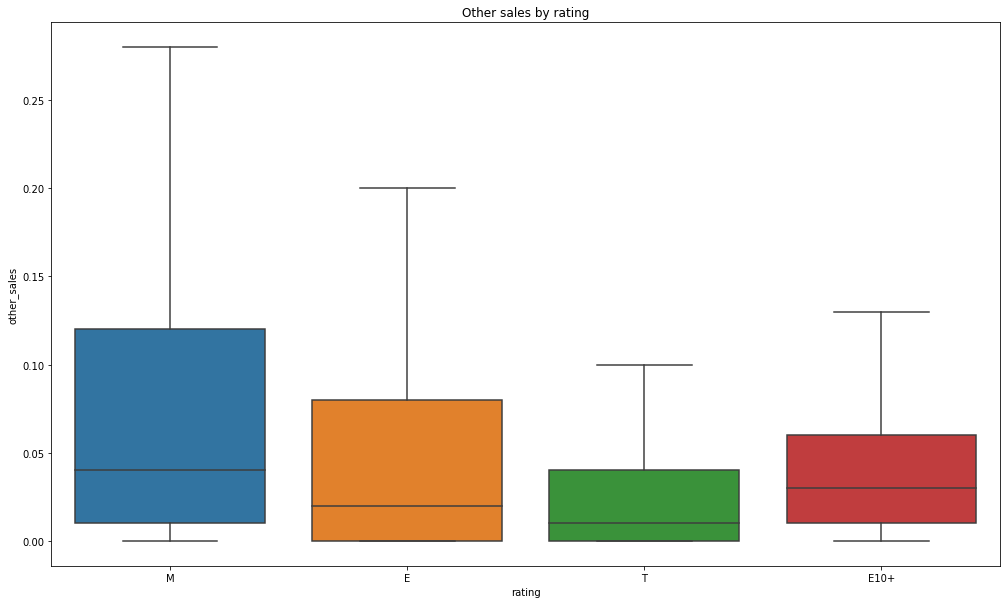

In [169]:
fig,ax=plt.subplots(figsize=(17,10))
ax=sns.boxplot(x="rating", y="other_sales", data=games1, showfliers = False)
plt.title("Other sales by rating")
plt.show()

In [171]:
top=list(other_region.head(1)['rating'])
top

['M']

In [172]:
total_region=games1.groupby(['rating'])['total_sales'].sum().reset_index().sort_values(by='total_sales',ascending=False).head()
total_region

,rating,total_sales
2,M,371.680
0,E,200.160
3,T,126.620
1,E10+,115.390


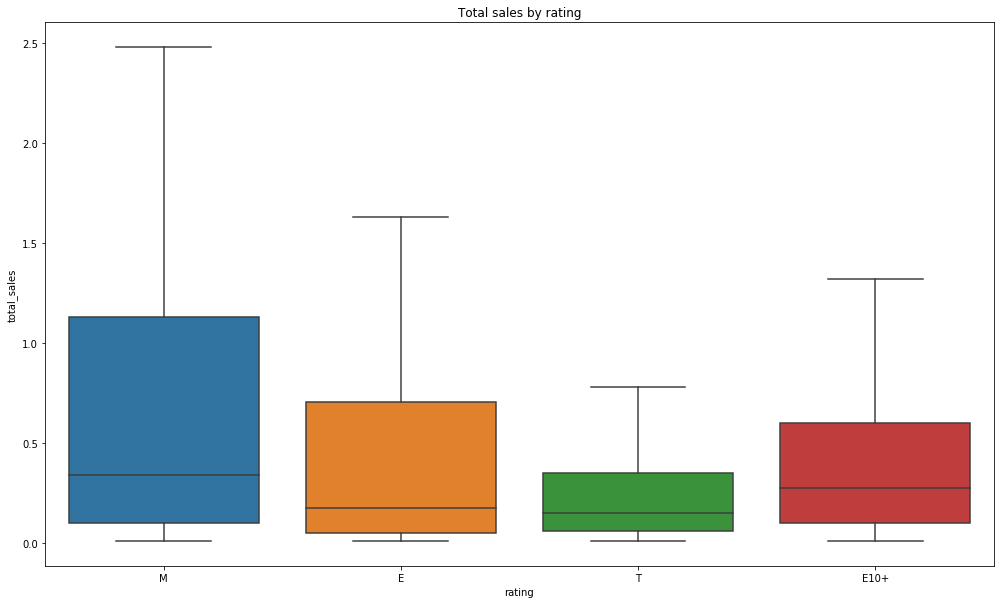

In [174]:
fig,ax=plt.subplots(figsize=(17,10))
ax=sns.boxplot(x="rating", y="total_sales", data=games1, showfliers = False)
plt.title("Total sales by rating")
plt.show()

In [175]:
top=list(total_region.head(1)['rating'])
top

['M']

- The rating definatly effects the sales

- Top  rating by sales differs between the global top, and Japan.

- In all but Japan the M rated games have top sales.

- In Japan Games rated T have top sales.

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Let's add some visualization here to make this analysis more understandable. For example boxplot for each region
</div>

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

Thank you for the feedback. I added visualization, I hope it is now better.
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment 2</b> <a class="tocSkip"></a>

Of course, much better👍
</div>

#### Analysis conclusions 

The conclusions are:

- The top 5 consoles are the same in all regions, except Japan. Japan is very different in it's preferance of consoles (PSV and WiiU, preformed much better then X360 and XOne, in Japan)

- All regions like action, shooter and role-playing games, all but Japan like sports games but people from Japan like fighting games more.  All but Europe like Misc games, but people from Europe like racing games more.


- The rating definatly effects the sales, top rating by sales differs between the global top, and Japan.
In all but Japan the M rated games have top sales, In Japan Games rated T have the top in sales.


### Test the hypotheses

In [96]:
alpha = 0.05 # like almost always

#### Average user ratings of the Xbox One and PC platforms are the same.

In [97]:
pc = games_user_clean.query('platform == "PC"')
pc.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
85,The Sims 3,PC,2009.000,Simulation,0.990,6.420,0.000,0.600,86.000,7.600,T,8.010
138,World of Warcraft,PC,2004.000,Role-Playing,0.080,6.210,0.000,0.000,93.000,7.300,T,6.290
192,Diablo III,PC,2012.000,Role-Playing,2.440,2.160,0.000,0.540,88.000,4.000,M,5.140
195,Microsoft Flight Simulator,PC,1996.000,Simulation,3.220,1.690,0.000,0.200,NaN,NaN,TBD,5.110
218,StarCraft II: Wings of Liberty,PC,2010.000,Strategy,2.570,1.680,0.000,0.580,93.000,8.200,T,4.830


In [98]:
box_1 = games_user_clean.query('platform == "XOne"')
box_1.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
99,Call of Duty: Black Ops 3,XOne,2015.000,Shooter,4.590,2.110,0.010,0.680,NaN,NaN,TBD,7.390
165,Grand Theft Auto V,XOne,2014.000,Action,2.810,2.190,0.000,0.470,97.000,7.900,M,5.470
179,Call of Duty: Advanced Warfare,XOne,2014.000,Shooter,3.220,1.550,0.010,0.480,81.000,5.400,M,5.260
242,Halo 5: Guardians,XOne,2015.000,Shooter,2.780,1.270,0.030,0.410,84.000,6.400,T,4.490
270,Fallout 4,XOne,2015.000,Role-Playing,2.510,1.320,0.010,0.380,88.000,6.200,M,4.220


In [99]:
print("pc var: " + str(np.var(pc['user_score'])) + " Xbox var: " + str(np.var(box_1['user_score'])))

pc var: 2.3300190000346053 Xbox var: 1.8861578428737795


In [100]:
st.levene(pc.dropna()['user_score'], box_1.dropna()['user_score'], center='mean' )

LeveneResult(statistic=3.3405237205763556, pvalue=0.06790861634772592)

<div class="alert alert-block alert-success">
<b>Reviewer's comment 2</b> <a class="tocSkip"></a>

Very cool that you did it
</div>

pvalue is higher then alpha (0.068 > 0.05), so equal_var = True.

In [101]:
results1 = st.ttest_ind(pc.dropna()['user_score'], box_1.dropna()['user_score'], equal_var = True)

if (results1.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")
    
print('p-value:', results1.pvalue)
print('PC user score mean: ', pc.user_score.mean())
print('XBox1 user score mean: ', box_1.user_score.mean())

We reject the null hypothesis
p-value: 9.50764263185837e-06
PC user score mean:  7.0676508344030795
XBox1 user score mean:  6.521311475409837


<b> As the null hypitesis was rejected, the alternative hypotesis can be raised that Average user ratings of the Xbox One and PC platforms are different (not the same), and furthermore that the average PC user rating might be higher (the mean of pc score is higher so it's posible).<b>


#### Average user ratings for the Action and Sports genres are different.

In [102]:
action = games_user_clean.query('genre == "Action"')
action.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013.000,Action,7.020,9.090,0.980,3.960,97.000,8.200,M,21.050
17,Grand Theft Auto: San Andreas,PS2,2004.000,Action,9.430,0.400,0.410,10.570,95.000,9.000,M,20.810
23,Grand Theft Auto V,X360,2013.000,Action,9.660,5.140,0.060,1.410,97.000,8.100,M,16.270
24,Grand Theft Auto: Vice City,PS2,2002.000,Action,8.410,5.490,0.470,1.780,95.000,8.700,M,16.150
38,Grand Theft Auto III,PS2,2001.000,Action,6.990,4.510,0.300,1.300,97.000,8.500,M,13.100


In [103]:
sport = games_user_clean.query('genre == "Sports"')
sport.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.000,Sports,41.360,28.960,3.770,8.450,76.000,8.000,E,82.540
3,Wii Sports Resort,Wii,2009.000,Sports,15.610,10.930,3.280,2.950,80.000,8.000,E,32.770
13,Wii Fit,Wii,2007.000,Sports,8.920,8.030,3.600,2.150,80.000,7.700,E,22.700
15,Wii Fit Plus,Wii,2009.000,Sports,9.010,8.490,2.530,1.770,80.000,7.400,E,21.800
77,FIFA 16,PS4,2015.000,Sports,1.120,6.120,0.060,1.280,82.000,4.300,E,8.580


In [104]:
print("Action var: " + str(np.var(action['user_score'])) + "   Sports var: " + str(np.var(sport['user_score'])))

Action var: 2.033897408103112   Sports var: 2.590966174925323


In [105]:
st.levene(action.dropna()['user_score'], sport.dropna()['user_score'], center='mean' )

LeveneResult(statistic=22.27114533284938, pvalue=2.4801227404824463e-06)

pvalue on Levene test for equal variances is small so they are not equal (equal_var = False).

In [106]:
results2 = st.ttest_ind(action.dropna()['user_score'], sport.dropna()['user_score'], equal_var = False)

if (results2.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")
    
print('p-value:', results2.pvalue)
print('Action games score mean: ', action.user_score.mean())
print('Sports games score mean: ', sport.user_score.mean())

We can't reject the null hypothesis
p-value: 0.09960911064955377
Action games score mean:  7.051771117166212
Sports games score mean:  6.9657065706570656


<div class="alert alert-block alert-success">
<b>Reviewer's comment 2</b> <a class="tocSkip"></a>

All right
</div>

<b>Failing to reject the null indicates that our sample did not provide sufficient evidence to conclude that the effect exists. However, at the same time, that lack of evidence doesn’t prove that the effect does not exist.
    
So average user ratings for the Action and Sports genres might be the same. <b>

### Overall conclusion

The initial data:

- The initial data had no duplicates. 

- It had missing values in year of release, scores (users and critics) and ESRB rating.  

- Year of release were possibly missing because of input errors, while score and rating values were probably missing because the game was not rated by one or several of the aforementioned bodies (the users, critics or ESRB commission).

- The rows containing tbd values could be used and analysed for other factors un-related to the user score.  

The analysis for revevant data (after 2013) showed that:

- There is a decline in sales with a low of 502 in 2016, this number of sales is the lowest from 2002.

-	The 5 most successful gaming consoles by z-score (positive) in the relevant time period are PS4, X360, PS3, XOne and 3DS. There are a few that lasted much longer than the mean longevity, like the PC, PSP, Wii, PS3 and X360. The consoles released after 2010, are too new to judge about their longevity (general mean longevity 6 so...).

-	Very significant differences in console sales with a minimum game sale at 0.01 sales (almost no one wanted to buy that game), up to 21.05 sales (which is an A new game is more likely to succeed on PS4, X360 or XOne.

-	The average sales by mean are very different from 0.801 (PS4) down to 0.052 (PSP). The mean sales are very dependent on outliers as concluded before a singular successful game can make a large change. If you go by median, median sales in PS4, X360, Wii, WiiU and XOne is higher than in other platforms.

-	There is a very strong correlation between user score and critic score. Which means that the critics opinions influence the common users, or critics are influenced by public opinion (or both).

-	There is a very weak positive correlation between critic score and sales, which suggests there is some probability of a connection between the two. Games better critic score may have better sales then others.

-	There is a weak negative correlation between score (user and critic) and year of release, which suggests that people are harder to please with the advance of time (also a possible nostalgia factor). Newer games may have a lower score.


Further analysis showed that:

- The top 5 consoles are the same in all regions, except Japan. Japan is very different in it's preferance of consoles (PSV and WiiU, preformed much better then X360 and XOne, in Japan)

- All regions like action, shooter and role-playing games, all but Japan like sports games but people from Japan like fighting games more.  All but Europe like Misc games, but people from Europe like racing games more.


- The rating definatly effects the sales, top rating by sales differs between the global top, and Japan. In all but Japan the M rated games have top sales, In Japan Games rated T have the top in sales.


Hypotesis testing showed that:

- As the null hypitesis was rejected, the alternative hypotesis can be raised that Average user ratings of the Xbox One and PC platforms are different (not the same), and furthermore that the average PC user rating might be higher (the mean of pc score is higher so it's posible).

- Failing to reject the null indicates that our sample did not provide sufficient evidence to conclude that the effect exists. However, at the same time, that lack of evidence doesn’t prove that the effect does not exist. So average user ratings for the Action and Sports genres might be the same.

So it can be concluded that:

- The game industry is in decline since 2008, as can be concluded by the declining trend.

- Of the current consoles PS4, PS3, XOne, 3DS and X360 have the best game sales globaly. But PSV and WiiU, preformed much better then X360 and XOne, in Japan.

- Games with better critic score seam to have better sales then others, and definatly score better with the users.

- Game sells of the same game may differ greatly over consoles, so chosing the right console for a game relese is very important.

-  A new game is more likely to sale well globaly if it's action, shooter and sports because these 3 genres are more profitable then others by mean, median and total sales. And if you go by mean and median only, shooter is the most profitable genre.

- Role-Playig games are also realy popular globaly (especialy in Japan), so a game should have role-playing elements (especialy if it is developed for the Japanise market).

- The rating definatly effects the sales, games with M rating have better sales then games with other ratings globaly. And games with T rating have better sales in Japan.

- PC user rating might be higher then Xbox One user rating, so relesing to PC might not bring sales but it might bring publicity.

- Japanise market is diferent from all other markets, if you develop a game for Japan you should realy consider the differace in praferances. 

<div class="alert alert-block alert-success">
<b>Reviewer's conclusion</b> <a class="tocSkip"></a>

You did very informative and beautiful project! I really like it. You are awesome!
</div>

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
    Thanks Andrey for all your help and feedback! I've changed the things that needed to be changed, and I hope that now it is much better.
    And special thanks for the alpha thing you recommended for the corr plot, I will certainly use it in my future work.

</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment 2</b> <a class="tocSkip"></a>

You are welcome!
</div>